In [1]:
import pandas as pd
from sklearn.cross_validation import train_test_split
import xgboost as xgb
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import numpy  as np
#import lightgbm as lgb

d:\ProgramData\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
orial_data = pd.read_csv('data/train.csv',parse_dates=[2])
orial_data.head()
orial_data.shape[0]

d:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


1017209

In [3]:
#数据拷贝一份进行处理，避免 对原始数据的改变
data_data = orial_data.copy()
#data_data.describe()
data_data.shape[0]

1017209

In [4]:
# 加载store 数据
store = pd.read_csv('data/store.csv')
data_store = store.copy()
#异常值处理
#'CompetitionOpenSinceYear': 0,
fill_values = { 'CompetitionOpenSinceYear': 0,'CompetitionDistance': 1, 'CompetitionOpenSinceMonth': 0, 'Promo2SinceWeek':0,'Promo2SinceYear':0,'PromoInterval':'None' }
data_store.fillna(value=fill_values,inplace = True)
store_drop_columns = ['PromoInterval']
data_store.drop(store_drop_columns,axis=1,inplace=True)
data_store.head(20)



,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear
0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0
3,4,c,c,620.0,9.0,2009.0,0,0.0,0.0
4,5,a,a,29910.0,4.0,2015.0,0,0.0,0.0
5,6,a,a,310.0,12.0,2013.0,0,0.0,0.0
6,7,a,c,24000.0,4.0,2013.0,0,0.0,0.0
7,8,a,a,7520.0,10.0,2014.0,0,0.0,0.0
8,9,a,c,2030.0,8.0,2000.0,0,0.0,0.0
9,10,a,a,3160.0,9.0,2009.0,0,0.0,0.0


In [5]:
##'CompetitionOpenSinceYear': 0  换成 Promo2SinceYear

#data_store['CompetitionOpenSinceYear'].fillna(data_store['Promo2SinceYear'],inplace = True)
#data_store.head(20)

In [6]:
#构建competitionOpen 最近竞争对手开业多少个月

In [7]:
#加载test 数据
test = pd.read_csv('data/test.csv')
data_test = test.copy()
data_test.fillna(value={'Open':1},inplace=True)
data_test.head(10)

,Id,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday
0,1,1,4,2015-09-17,1.0,1,0,0
1,2,3,4,2015-09-17,1.0,1,0,0
2,3,7,4,2015-09-17,1.0,1,0,0
3,4,8,4,2015-09-17,1.0,1,0,0
4,5,9,4,2015-09-17,1.0,1,0,0
5,6,10,4,2015-09-17,1.0,1,0,0
6,7,11,4,2015-09-17,1.0,1,0,0
7,8,12,4,2015-09-17,1.0,1,0,0
8,9,13,4,2015-09-17,1.0,1,0,0
9,10,14,4,2015-09-17,1.0,1,0,0


In [8]:
#将字符的属性转换成数字
replace_data = {'a':1,'b':2,'c':3,'d':4}
print(type(data_store))
print(type(data_store['Assortment']))
print(type(data_store.Assortment))
data_store['Assortment'].replace(replace_data,inplace=True)
data_store['StoreType'].replace(replace_data,inplace=True)

data_store.head(10)

data_data['StateHoliday'].replace(replace_data,inplace=True)
data_data['StateHoliday'] = data_data['StateHoliday'].apply(pd.to_numeric)
data_data.shape[0]

data_test['StateHoliday'].replace(replace_data,inplace=True)
data_test['StateHoliday'] = data_test['StateHoliday'].apply(pd.to_numeric)
print(data_test['StateHoliday'].unique())

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
[0 1]


In [9]:
# 进行归一化 对CompetitionDistance，
'''
scaler = MinMaxScaler()
x = data_store['CompetitionDistance'].values.reshape(-1,1)
data_store['CompetitionDistance'] = scaler.fit_transform(x)
data_store.head(5)
'''

"\nscaler = MinMaxScaler()\nx = data_store['CompetitionDistance'].values.reshape(-1,1)\ndata_store['CompetitionDistance'] = scaler.fit_transform(x)\ndata_store.head(5)\n"

In [10]:
#pd.get_dummies(data_store)
data_test.head(1)

,Id,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday
0,1,1,4,2015-09-17,1.0,1,0,0


In [11]:
data_data.head(3)

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1


In [12]:
# 提取出月份、年份,数据增加年份和月份的列
import time, datetime
def conver_date(data):
    print(data.head(5))
    data_month = pd.to_datetime(data['Date'],format='%Y-%m-%d %H:%M:%S')
    data_date = pd.to_datetime(data['Date'],format='%Y/%m/%d')
    data['year'] = data_date.dt.year
    data['month'] = data_date.dt.month
    data['day'] = data_date.dt.day
    data['WweekOfYear']= data_date.dt.weekofyear
    data.drop('Date',axis=1,inplace=True)
    return data
data_data = conver_date(data_data)
data_test = conver_date(data_test)
data_test.head(5)
    
#print(time.strftime('%Y-%m-%d %H:%M:%S'))
#data_month = pd.to_datetime(data_data['Date'],format='%Y-%m-%d %H:%M:%S')

#record['ym']=record['HAPPEN_TIME']
#data_year =data_data['Date'].apply(lambda x:x.split('-')[0])
#data_date = pd.to_datetime(data_data['Date'],format='%Y/%m/%d')
#data_data['year'] = data_date.dt.year
#data_data['month'] = data_date.dt.month
#data_data['day'] = data_date.dt.day
#data_data.drop('Date',axis=1,inplace=True)


#month2str = {1:'Jan',2:'Feb',3:'Mar',4:'Apr',5:'May',6:'Jun',7:'Jul',8:'Aug',9:'Sept',10:'Oct',11:'Nov',12:'Dec'}
#data_data['month2str'] = data_data.month.map(month2str)
#data_data.head(25)
#data_data.shape[0]

   Store  DayOfWeek       Date  Sales  Customers  Open  Promo  StateHoliday  \
0      1          5 2015-07-31   5263        555     1      1             0   
1      2          5 2015-07-31   6064        625     1      1             0   
2      3          5 2015-07-31   8314        821     1      1             0   
3      4          5 2015-07-31  13995       1498     1      1             0   
4      5          5 2015-07-31   4822        559     1      1             0   

   SchoolHoliday  
0              1  
1              1  
2              1  
3              1  
4              1  
   Id  Store  DayOfWeek        Date  Open  Promo  StateHoliday  SchoolHoliday
0   1      1          4  2015-09-17   1.0      1             0              0
1   2      3          4  2015-09-17   1.0      1             0              0
2   3      7          4  2015-09-17   1.0      1             0              0
3   4      8          4  2015-09-17   1.0      1             0              0
4   5      9         

,Id,Store,DayOfWeek,Open,Promo,StateHoliday,SchoolHoliday,year,month,day,WweekOfYear
0,1,1,4,1.0,1,0,0,2015,9,17,38
1,2,3,4,1.0,1,0,0,2015,9,17,38
2,3,7,4,1.0,1,0,0,2015,9,17,38
3,4,8,4,1.0,1,0,0,2015,9,17,38
4,5,9,4,1.0,1,0,0,2015,9,17,38


In [13]:
data_data.shape[0]
#选取open = 1 的数据
data_data = data_data.loc[(data_data['Open'] == 1)]
print(data_data.shape[0])
data_data  = data_data.loc[(data_data['Sales'] > 0)]
print(data_data.shape[0])


844392
844338


In [14]:
#选取某一个店的ID,获取其销售记录 并显示其每个月的销售情况
def get_month_sales_by_id(id):
    store_data = data_data.loc[(data_data['Store'] == 1)]
    store_data_2013 = store_data.loc[store_data['year'] == 2013]
    store_data_2014 = store_data.loc[store_data['year'] == 2014]
    store_data_2015 = store_data.loc[store_data['year'] == 2015]
    
    #计算每年每个月的销售情况
    store_data_2013_month = store_data_2013.groupby(by=['month'])['Sales'].sum()
    store_data_2014_month = store_data_2014.groupby(by=['month'])['Sales'].sum()
    store_data_2015_month = store_data_2015.groupby(by=['month'])['Sales'].sum()
    store_data_2015_month.rename(columns={"month":"sum_of_value"},inplace=True)
    
    #print(store_data_2015_month.to_frame().columns())
    #print(store_data_2015_month[1])
    #print(store_data_2015_month.head(20))
    store_data_month={}
    store_data_month['2013'] = store_data_2013_month
    store_data_month['2014'] = store_data_2014_month
    store_data_month['2015'] = store_data_2015_month
    
    return store_data_month
a=get_month_sales_by_id(5)
print("2014 1",a['2014'][1])

2014 1 118814


In [15]:
month_info = get_month_sales_by_id(5)
month_info['2015'][8] = month_info['2015'][9] = month_info['2015'][10] =  month_info['2015'][11] = month_info['2015'][12] = 0
for i in month_info:
    print(i)
    print(month_info[i])

2013
month
1     128431
2     125271
3     145169
4     118009
5     118225
6     113411
7     128032
8     118320
9     108867
10    114641
11    127596
12    145168
Name: Sales, dtype: int64
2014
month
1     118814
2     110434
3     116467
4     115292
5     117715
6     107905
7     122604
8     111004
9     106398
10    114897
11    130852
12    161026
Name: Sales, dtype: int64
2015
month
1     119602
2     106635
3     118917
4     110655
5     105220
6     110011
7     121266
8          0
9          0
10         0
11         0
12         0
dtype: int64


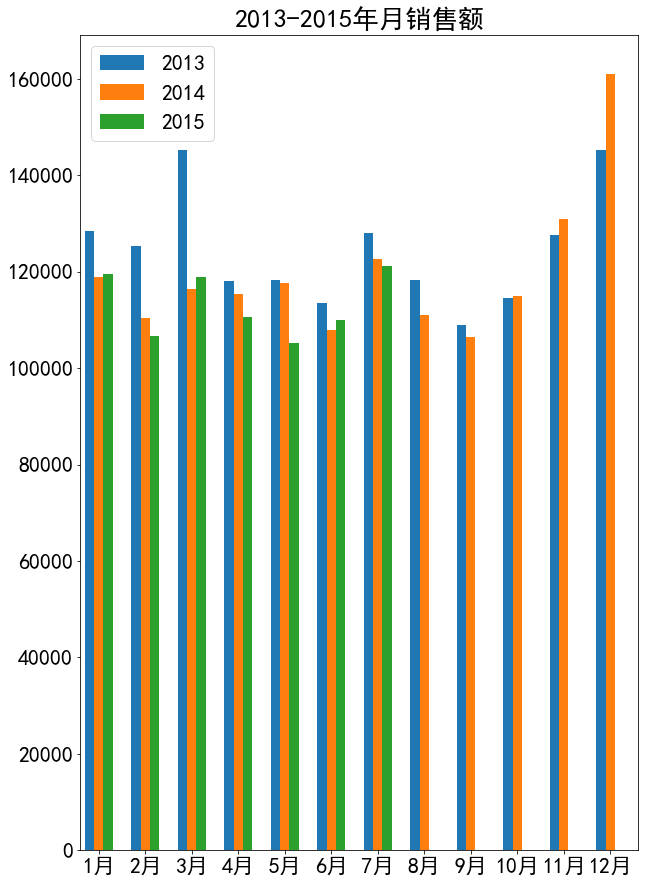

In [16]:


#解决中文乱码的问题
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['font.family']='sans-serif'
#解决负号'-'显示为方块的问题
plt.rcParams['axes.unicode_minus'] = False
plt.rcParams['font.size'] = 22

#X=[0,1,2,3,4,5,6,7,8,9,10,11]
x_labels = ['1月','2月','3月','4月','5月','6月','7月','8月','9月','10月','11月','12月']
X = np.arange(12)
bar_width = 0.2
Y=[222,42,455,664,454,334,222,42,455,664,454,334]

fig = plt.figure(figsize=(10,15))
ax = plt.subplot()
bars = []
years = []
ij = 0
for i in month_info:
    ij = ij +1
    bar_i = ax.bar(X+bar_width*ij,month_info[i],bar_width)
    bars.append(bar_i)
    years.append(i)

#bar_1 = ax.bar(X+bar_width,month_info['2013'],bar_width)
#bar_2 = ax.bar(X+bar_width*2,month_info['2014'],bar_width)
#bar_3 = ax.bar(X+bar_width*3,month_info['2015'],bar_width)
ax.set_xticklabels(x_labels)
plt.xticks(X+bar_width*2)
plt.xlim(0,len(x_labels))
plt.title('2013-2015年月销售额')
handles, labels = ax.get_legend_handles_labels()

plt.legend(bars, years,loc = 'best')
#plt.set_xticks(x_labels)
#plt.savefig('./year_month.jpg')
plt.show()


In [17]:
data_data = data_data.merge(data_store,left_on = 'Store',right_on = 'Store',how="left")
print(data_data.shape[0])
data_data.head(10)
#

844338


,Store,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,year,month,day,WweekOfYear,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear
0,1,5,5263,555,1,1,0,1,2015,7,31,31,3,1,1270.0,9.0,2008.0,0,0.0,0.0
1,2,5,6064,625,1,1,0,1,2015,7,31,31,1,1,570.0,11.0,2007.0,1,13.0,2010.0
2,3,5,8314,821,1,1,0,1,2015,7,31,31,1,1,14130.0,12.0,2006.0,1,14.0,2011.0
3,4,5,13995,1498,1,1,0,1,2015,7,31,31,3,3,620.0,9.0,2009.0,0,0.0,0.0
4,5,5,4822,559,1,1,0,1,2015,7,31,31,1,1,29910.0,4.0,2015.0,0,0.0,0.0
5,6,5,5651,589,1,1,0,1,2015,7,31,31,1,1,310.0,12.0,2013.0,0,0.0,0.0
6,7,5,15344,1414,1,1,0,1,2015,7,31,31,1,3,24000.0,4.0,2013.0,0,0.0,0.0
7,8,5,8492,833,1,1,0,1,2015,7,31,31,1,1,7520.0,10.0,2014.0,0,0.0,0.0
8,9,5,8565,687,1,1,0,1,2015,7,31,31,1,3,2030.0,8.0,2000.0,0,0.0,0.0
9,10,5,7185,681,1,1,0,1,2015,7,31,31,1,1,3160.0,9.0,2009.0,0,0.0,0.0


In [18]:
#构建competitionOpen 最近竞争对手开业多少个月
data_data['CompetitionOpen'] = 12 *(data_data['year']-data_data['CompetitionOpenSinceYear'])+(data_data['month']-data_data['CompetitionOpenSinceMonth'])
data_data.head(5)

,Store,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,year,month,...,WweekOfYear,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,CompetitionOpen
0,1,5,5263,555,1,1,0,1,2015,7,...,31,3,1,1270.0,9.0,2008.0,0,0.0,0.0,82.0
1,2,5,6064,625,1,1,0,1,2015,7,...,31,1,1,570.0,11.0,2007.0,1,13.0,2010.0,92.0
2,3,5,8314,821,1,1,0,1,2015,7,...,31,1,1,14130.0,12.0,2006.0,1,14.0,2011.0,103.0
3,4,5,13995,1498,1,1,0,1,2015,7,...,31,3,3,620.0,9.0,2009.0,0,0.0,0.0,70.0
4,5,5,4822,559,1,1,0,1,2015,7,...,31,1,1,29910.0,4.0,2015.0,0,0.0,0.0,3.0


In [19]:
#构建特征PromoOpen 开始促销多少个月
data_data['PromoOpen'] = 12*(data_data['year']-data_data['Promo2SinceYear'])+(data_data['WweekOfYear']-data_data['Promo2SinceWeek'])/4.0
data_data.head(5)

,Store,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,year,month,...,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,CompetitionOpen,PromoOpen
0,1,5,5263,555,1,1,0,1,2015,7,...,3,1,1270.0,9.0,2008.0,0,0.0,0.0,82.0,24187.75
1,2,5,6064,625,1,1,0,1,2015,7,...,1,1,570.0,11.0,2007.0,1,13.0,2010.0,92.0,64.50
2,3,5,8314,821,1,1,0,1,2015,7,...,1,1,14130.0,12.0,2006.0,1,14.0,2011.0,103.0,52.25
3,4,5,13995,1498,1,1,0,1,2015,7,...,3,3,620.0,9.0,2009.0,0,0.0,0.0,70.0,24187.75
4,5,5,4822,559,1,1,0,1,2015,7,...,1,1,29910.0,4.0,2015.0,0,0.0,0.0,3.0,24187.75


In [20]:
#test 数据获取open=1 的数据
print(data_test.shape[0])
data_test_noOpen = data_test.loc[(data_test['Open'] == 0)]
data_test_noPenIds = data_test_noOpen['Id']

data_test = data_test.loc[(data_test['Open'] == 1)]
data_test_ids = data_test['Id']
data_test.drop(['Id'],axis=1,inplace = True)
print(data_test.shape[0])
print(data_test_noOpen.shape[0])
print(data_test_noOpen)
#data=data_test[~((data_test['Open']==0)|(data_test['Open']==1))]
#print(data)

41088
35104
5984
          Id  Store  DayOfWeek  Open  Promo  StateHoliday  SchoolHoliday  \
543      544    703          4   0.0      1             0              0   
676      677    879          4   0.0      1             0              0   
840      841   1097          4   0.0      1             0              0   
1399    1400    703          3   0.0      1             0              0   
1532    1533    879          3   0.0      1             0              0   
1696    1697   1097          3   0.0      1             0              0   
2255    2256    703          2   0.0      1             0              0   
2388    2389    879          2   0.0      1             0              0   
2552    2553   1097          2   0.0      1             0              0   
3111    3112    703          1   0.0      1             0              0   
3244    3245    879          1   0.0      1             0              1   
3408    3409   1097          1   0.0      1             0              

In [21]:
data_test = data_test.merge(data_store,left_on = 'Store',right_on = 'Store',how="left")
print(data_test.shape[0])
data_test.head(10)

35104


,Store,DayOfWeek,Open,Promo,StateHoliday,SchoolHoliday,year,month,day,WweekOfYear,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear
0,1,4,1.0,1,0,0,2015,9,17,38,3,1,1270.0,9.0,2008.0,0,0.0,0.0
1,3,4,1.0,1,0,0,2015,9,17,38,1,1,14130.0,12.0,2006.0,1,14.0,2011.0
2,7,4,1.0,1,0,0,2015,9,17,38,1,3,24000.0,4.0,2013.0,0,0.0,0.0
3,8,4,1.0,1,0,0,2015,9,17,38,1,1,7520.0,10.0,2014.0,0,0.0,0.0
4,9,4,1.0,1,0,0,2015,9,17,38,1,3,2030.0,8.0,2000.0,0,0.0,0.0
5,10,4,1.0,1,0,0,2015,9,17,38,1,1,3160.0,9.0,2009.0,0,0.0,0.0
6,11,4,1.0,1,0,0,2015,9,17,38,1,3,960.0,11.0,2011.0,1,1.0,2012.0
7,12,4,1.0,1,0,0,2015,9,17,38,1,3,1070.0,0.0,0.0,1,13.0,2010.0
8,13,4,1.0,1,0,0,2015,9,17,38,4,1,310.0,0.0,0.0,1,45.0,2009.0
9,14,4,1.0,1,0,0,2015,9,17,38,1,1,1300.0,3.0,2014.0,1,40.0,2011.0


In [22]:
#构建特征PromoOpen 开始促销多少个月
data_test['PromoOpen'] = 12*(data_data['year']-data_test['Promo2SinceYear'])+(data_test['WweekOfYear']-data_test['Promo2SinceWeek'])/4.0

data_test['CompetitionOpen'] = 12 *(data_test['year']-data_test['CompetitionOpenSinceYear'])+(data_test['month']-data_test['CompetitionOpenSinceMonth'])
data_test.head(5)

,Store,DayOfWeek,Open,Promo,StateHoliday,SchoolHoliday,year,month,day,WweekOfYear,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoOpen,CompetitionOpen
0,1,4,1.0,1,0,0,2015,9,17,38,3,1,1270.0,9.0,2008.0,0,0.0,0.0,24189.5,84.0
1,3,4,1.0,1,0,0,2015,9,17,38,1,1,14130.0,12.0,2006.0,1,14.0,2011.0,54.0,105.0
2,7,4,1.0,1,0,0,2015,9,17,38,1,3,24000.0,4.0,2013.0,0,0.0,0.0,24189.5,29.0
3,8,4,1.0,1,0,0,2015,9,17,38,1,1,7520.0,10.0,2014.0,0,0.0,0.0,24189.5,11.0
4,9,4,1.0,1,0,0,2015,9,17,38,1,3,2030.0,8.0,2000.0,0,0.0,0.0,24189.5,181.0


In [23]:
#test 
'''
#归一化处理
scaler = MinMaxScaler()
x = data_data['PromoOpen'].values.reshape(-1,1)
data_data['PromoOpen'] = scaler.fit_transform(x)

x = data_data['CompetitionOpen'].values.reshape(-1,1)
data_data['CompetitionOpen'] = scaler.fit_transform(x)

#归一化 测试集
x = data_test['PromoOpen'].values.reshape(-1,1)
data_test['PromoOpen'] = scaler.fit_transform(x)

x = data_test['CompetitionOpen'].values.reshape(-1,1)
data_test['CompetitionOpen'] = scaler.fit_transform(x)
'''

"\n#归一化处理\nscaler = MinMaxScaler()\nx = data_data['PromoOpen'].values.reshape(-1,1)\ndata_data['PromoOpen'] = scaler.fit_transform(x)\n\nx = data_data['CompetitionOpen'].values.reshape(-1,1)\ndata_data['CompetitionOpen'] = scaler.fit_transform(x)\n\n#归一化 测试集\nx = data_test['PromoOpen'].values.reshape(-1,1)\ndata_test['PromoOpen'] = scaler.fit_transform(x)\n\nx = data_test['CompetitionOpen'].values.reshape(-1,1)\ndata_test['CompetitionOpen'] = scaler.fit_transform(x)\n"

In [24]:
#dummies 独热编码
print(data_data.shape[0])
if 'StoreType_1'  not in data_data.columns:
    data_data = pd.get_dummies(data_data,columns=['StoreType','StateHoliday'])
    print(data_data.shape)
    print(data_data.columns.values)
    print(data_data.head(5))
    print("*************")
    print(data_test.shape[0])
    data_test = pd.get_dummies(data_test,columns=['StoreType','StateHoliday'])
    data_test['StateHoliday_2'] = 0
    data_test['StateHoliday_3'] = 0
    data_data.sort_index(axis=1,inplace=True)
    data_test.sort_index(axis=1,inplace=True)
    print(data_test.shape)
    print(data_test.columns.values)
    print(data_test.head(5))

844338
(844338, 28)
['Store' 'DayOfWeek' 'Sales' 'Customers' 'Open' 'Promo' 'SchoolHoliday'
 'year' 'month' 'day' 'WweekOfYear' 'Assortment' 'CompetitionDistance'
 'CompetitionOpenSinceMonth' 'CompetitionOpenSinceYear' 'Promo2'
 'Promo2SinceWeek' 'Promo2SinceYear' 'CompetitionOpen' 'PromoOpen'
 'StoreType_1' 'StoreType_2' 'StoreType_3' 'StoreType_4' 'StateHoliday_0'
 'StateHoliday_1' 'StateHoliday_2' 'StateHoliday_3']
   Store  DayOfWeek  Sales  Customers  Open  Promo  SchoolHoliday  year  \
0      1          5   5263        555     1      1              1  2015   
1      2          5   6064        625     1      1              1  2015   
2      3          5   8314        821     1      1              1  2015   
3      4          5  13995       1498     1      1              1  2015   
4      5          5   4822        559     1      1              1  2015   

   month  day       ...        CompetitionOpen  PromoOpen  StoreType_1  \
0      7   31       ...                   82.0   2418

In [25]:
data_data.sort_index(axis=1,inplace=True)
data_test.sort_index(axis=1,inplace=True)

In [26]:

#duplicate_columns = data_data.columns[data_data.columns.duplicated()]
#print(duplicate_columns)
data_data.shape[0]

#print(type(data_data['stateHoliday'][63557]))
 

844338

In [27]:
from math import sqrt
def rmspe(y,y_pre):
    #print("y-y_pre/y",(y-y_pre)/y)
    #print("(y-y_pre/y)**2",((y-y_pre)/y)**2)
    a = np.mean(((y-y_pre)/y)**2)
    return sqrt(a)
    #print('y:',y)
    #print('y_pre:',y_pre)
    #print("y/y_pre:",(y_pre / y - 1)**2)
    #print("mean:",np.mean((y_pre / y - 1)**2))


In [28]:
import math
def rmspe_xgboost(preds, dtrain):       # written by myself
    labels = np.expm1(dtrain.get_label())
    preds = np.expm1(preds)
    #print("***labels:*****",labels)
    #print("***preds:*****",preds)
    
    # return a pair metric_name, result
    # since preds are margin(before logistic transformation, cutoff at 0)
    #err = np.mean(((labels-preds)/labels)**2)
    return 'rmspe_xgboost',rmspe(labels,preds)

In [29]:
'''
# 训练集和测试集随机划分
#train_data = data_data.drop(['Sales'],axis=1)
if 'Customers' in data_data.columns:
    data_data.drop(['Customers'],axis=1,inplace=True)
X_train, X_valid = train_test_split(data_data, test_size=0.2, random_state=10)
#print("+++++++++++++++++++++++++++++++++++")
#print(X_train)
#print(X_valid)
y_train = np.log1p(X_train.Sales)
y_valid = np.log1p(X_valid.Sales)
#y_train = X_train.Sales
#y_valid = X_valid.Sales

print(type(X_train.Sales))
print("x_TRAIN:",X_train.Sales.shape[0])
#X_train.drop(['Sales'],axis=1,inplace=True)
print("####################")
#print(type(X_train))
#print(type(y_train))
X_train.drop(['Sales'],axis=1,inplace=True)
X_valid.drop(['Sales'],axis=1,inplace=True)

dtrain = xgb.DMatrix(X_train,label=y_train)
dvalid = xgb.DMatrix(X_valid,label=y_valid)
print(X_train.shape[0])

print(type(y_train))
print("y_train:",y_train.shape[0])
#print(X_train.Sales.unique())
num_boost_round = 50
watch_list= [(dtrain, 'train'), (dvalid, 'valid')]
params = {"objective": "reg:linear","booster": "gbtree", "eta": 0.5,"max_depth": 10,"min_child_weight":5}
print("start train data by xgboost")
xgboost_model = xgb.train(params, dtrain, num_boost_round,evals=watch_list)
print("valid....")
y_pre = xgboost_model.predict(dvalid)


print(y_pre)
print(len(y_pre))
print(len(y_valid))
print(type(y_valid))
'''

'\n# 训练集和测试集随机划分\n#train_data = data_data.drop([\'Sales\'],axis=1)\nif \'Customers\' in data_data.columns:\n    data_data.drop([\'Customers\'],axis=1,inplace=True)\nX_train, X_valid = train_test_split(data_data, test_size=0.2, random_state=10)\n#print("+++++++++++++++++++++++++++++++++++")\n#print(X_train)\n#print(X_valid)\ny_train = np.log1p(X_train.Sales)\ny_valid = np.log1p(X_valid.Sales)\n#y_train = X_train.Sales\n#y_valid = X_valid.Sales\n\nprint(type(X_train.Sales))\nprint("x_TRAIN:",X_train.Sales.shape[0])\n#X_train.drop([\'Sales\'],axis=1,inplace=True)\nprint("####################")\n#print(type(X_train))\n#print(type(y_train))\nX_train.drop([\'Sales\'],axis=1,inplace=True)\nX_valid.drop([\'Sales\'],axis=1,inplace=True)\n\ndtrain = xgb.DMatrix(X_train,label=y_train)\ndvalid = xgb.DMatrix(X_valid,label=y_valid)\nprint(X_train.shape[0])\n\nprint(type(y_train))\nprint("y_train:",y_train.shape[0])\n#print(X_train.Sales.unique())\nnum_boost_round = 50\nwatch_list= [(dtrain, \'train\

In [30]:
# 训练集和测试集手动划分
if 'Customers' in data_data.columns:
    data_data.drop(['Customers'],axis=1,inplace=True)
X_train = data_data[0:813766]
X_valid = data_data[813766::]
#print(X_train)
#print("*********************")
#print(X_valid)
#X_train, X_valid = train_test_split(data_data, test_size=0.2, random_state=10)
#print("+++++++++++++++++++++++++++++++++++")
#print(X_train)
#print(X_valid)

y_train = np.log1p(X_train.Sales)
y_valid = np.log1p(X_valid.Sales)
#y_train = X_train.Sales
#y_valid = X_valid.Sales

print(type(X_train.Sales))
print("x_TRAIN:",X_train.Sales.shape[0])
#X_train.drop(['Sales'],axis=1,inplace=True)
print("####################")
#print(type(X_train))
#print(type(y_train))
X_valid_sales =X_valid['Sales'] 
X_train.drop(['Sales'],axis=1,inplace=True)
X_valid.drop(['Sales'],axis=1,inplace=True)

dtrain = xgb.DMatrix(X_train,label=y_train)
dvalid = xgb.DMatrix(X_valid,label=y_valid)
print(X_train.shape[0])

print(type(y_train))
print("y_train:",y_train.shape[0])
print("***********************************")
print(X_valid.shape[0])
#print(X_train.Sales.unique())


<class 'pandas.core.series.Series'>
x_TRAIN: 813766
####################


d:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


813766
<class 'pandas.core.series.Series'>
y_train: 813766
***********************************
30572


In [31]:
#************** 训练得分的读写 ***********************
import json
def write_record(data,file):
    jsObj = json.dumps(data)
    fileObject = open(file, 'w')
    fileObject.write(jsObj)
    fileObject.close()

# 读log 记录
def read_record(file):
    fileObject = open(file, 'r')
    file_txt = fileObject.read()
    json_content = json.loads(file_txt)
    return json_content

In [66]:
#********************开始训练***************************
num_boost_round = 30000
min_child_weight = 6
max_depth=9
eta = 0.008
watch_list= [(dtrain, 'train'), (dvalid, 'valid')]
evals_result = dict()
params = {"objective": "reg:linear","booster": "gbtree", "eta": eta,"max_depth":max_depth,"min_child_weight":min_child_weight} #"min_child_weight":5
print("start train data by xgboost")
xgboost_model = xgb.train(params, dtrain, num_boost_round,feval=rmspe_xgboost,evals=watch_list,verbose_eval=10,early_stopping_rounds=500,evals_result=evals_result)
print("valid....")
#保存模型
model_name = "model/num"+str(num_boost_round)+"_weight"+str(min_child_weight)+"_maxdepth"+str(max_depth)+"_eta"+str(eta)+".model"
log_name= "record/num"+str(num_boost_round)+"_weight"+str(min_child_weight)+"_maxdepth"+str(max_depth)+"_eta"+str(eta)+".txt"
xgboost_model.save_model(model_name)
print("save...",model_name)
write_record(evals_result,log_name)
print(".....save log ..........",log_name)


start train data by xgboost
[13:59:51] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 194 extra nodes, 0 pruned nodes, max_depth=9
[0]	train-rmse:8.20666	valid-rmse:8.09443	train-rmspe_xgboost:0.999869	valid-rmspe_xgboost:0.999853
Multiple eval metrics have been passed: 'valid-rmspe_xgboost' will be used for early stopping.

Will train until valid-rmspe_xgboost hasn't improved in 500 rounds.
[13:59:51] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 194 extra nodes, 0 pruned nodes, max_depth=9
[13:59:52] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 194 extra nodes, 0 pruned nodes, max_depth=9
[13:59:53] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 196 extra nodes, 0 pruned nodes, max_depth=9
[13:59:53] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 194 extra nodes, 0

[14:00:17] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 258 extra nodes, 0 pruned nodes, max_depth=9
[14:00:17] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 294 extra nodes, 0 pruned nodes, max_depth=9
[14:00:18] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 280 extra nodes, 0 pruned nodes, max_depth=9
[14:00:18] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 252 extra nodes, 0 pruned nodes, max_depth=9
[14:00:19] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 286 extra nodes, 0 pruned nodes, max_depth=9
[14:00:19] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 264 extra nodes, 0 pruned nodes, max_depth=9
[14:00:20] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 242 extra nodes,

[14:00:45] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 270 extra nodes, 0 pruned nodes, max_depth=9
[14:00:45] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 254 extra nodes, 0 pruned nodes, max_depth=9
[14:00:46] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 336 extra nodes, 0 pruned nodes, max_depth=9
[14:00:46] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 278 extra nodes, 0 pruned nodes, max_depth=9
[14:00:47] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 284 extra nodes, 0 pruned nodes, max_depth=9
[14:00:47] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 250 extra nodes, 0 pruned nodes, max_depth=9
[14:00:48] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 338 extra nodes,

[14:01:13] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 462 extra nodes, 0 pruned nodes, max_depth=9
[14:01:14] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 376 extra nodes, 0 pruned nodes, max_depth=9
[14:01:14] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 376 extra nodes, 0 pruned nodes, max_depth=9
[14:01:15] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 524 extra nodes, 0 pruned nodes, max_depth=9
[160]	train-rmse:2.29037	valid-rmse:2.22334	train-rmspe_xgboost:0.891837	valid-rmspe_xgboost:0.883159
[14:01:16] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 346 extra nodes, 0 pruned nodes, max_depth=9
[14:01:16] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 364 extra nodes, 0 pruned nodes, max_depth=9
[14:01:16] d:\bu

[14:01:43] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 514 extra nodes, 0 pruned nodes, max_depth=9
[210]	train-rmse:1.54872	valid-rmse:1.4926	train-rmspe_xgboost:0.774261	valid-rmspe_xgboost:0.758941
[14:01:43] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 568 extra nodes, 0 pruned nodes, max_depth=9
[14:01:44] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 546 extra nodes, 0 pruned nodes, max_depth=9
[14:01:44] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 622 extra nodes, 0 pruned nodes, max_depth=9
[14:01:45] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 504 extra nodes, 0 pruned nodes, max_depth=9
[14:01:45] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 510 extra nodes, 0 pruned nodes, max_depth=9
[14:01:46] d:\bui

[14:02:11] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 656 extra nodes, 0 pruned nodes, max_depth=9
[14:02:12] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 600 extra nodes, 0 pruned nodes, max_depth=9
[14:02:12] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 638 extra nodes, 0 pruned nodes, max_depth=9
[14:02:13] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 648 extra nodes, 0 pruned nodes, max_depth=9
[14:02:14] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 668 extra nodes, 0 pruned nodes, max_depth=9
[14:02:14] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 532 extra nodes, 0 pruned nodes, max_depth=9
[14:02:15] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 638 extra nodes,

[14:02:41] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 786 extra nodes, 0 pruned nodes, max_depth=9
[14:02:42] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 586 extra nodes, 0 pruned nodes, max_depth=9
[14:02:42] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 614 extra nodes, 0 pruned nodes, max_depth=9
[14:02:43] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 622 extra nodes, 0 pruned nodes, max_depth=9
[14:02:43] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 794 extra nodes, 0 pruned nodes, max_depth=9
[14:02:44] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 698 extra nodes, 0 pruned nodes, max_depth=9
[320]	train-rmse:0.68886	valid-rmse:0.653972	train-rmspe_xgboost:0.479556	valid-rmspe_xgboost:0.460692
[14:02:45] d:\b

[14:03:11] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 484 extra nodes, 0 pruned nodes, max_depth=9
[14:03:12] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 886 extra nodes, 0 pruned nodes, max_depth=9
[14:03:12] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 868 extra nodes, 0 pruned nodes, max_depth=9
[370]	train-rmse:0.501126	valid-rmse:0.477862	train-rmspe_xgboost:0.383743	valid-rmspe_xgboost:0.374464
[14:03:13] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 564 extra nodes, 0 pruned nodes, max_depth=9
[14:03:14] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 870 extra nodes, 0 pruned nodes, max_depth=9
[14:03:14] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 654 extra nodes, 0 pruned nodes, max_depth=9
[14:03:15] d:\

[14:03:42] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 858 extra nodes, 0 pruned nodes, max_depth=9
[14:03:42] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 748 extra nodes, 0 pruned nodes, max_depth=9
[14:03:43] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 874 extra nodes, 0 pruned nodes, max_depth=9
[14:03:43] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 886 extra nodes, 0 pruned nodes, max_depth=9
[14:03:44] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 472 extra nodes, 0 pruned nodes, max_depth=9
[14:03:44] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 724 extra nodes, 0 pruned nodes, max_depth=9
[14:03:45] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 778 extra nodes,

[14:04:11] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 940 extra nodes, 0 pruned nodes, max_depth=9
[14:04:12] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 550 extra nodes, 0 pruned nodes, max_depth=9
[14:04:12] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 934 extra nodes, 0 pruned nodes, max_depth=9
[14:04:13] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 806 extra nodes, 0 pruned nodes, max_depth=9
[14:04:13] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 362 extra nodes, 0 pruned nodes, max_depth=9
[14:04:14] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 622 extra nodes, 0 pruned nodes, max_depth=9
[14:04:14] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 806 extra nodes,

[14:04:41] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 732 extra nodes, 0 pruned nodes, max_depth=9
[14:04:41] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 940 extra nodes, 0 pruned nodes, max_depth=9
[14:04:42] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 846 extra nodes, 0 pruned nodes, max_depth=9
[14:04:42] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 906 extra nodes, 0 pruned nodes, max_depth=9
[530]	train-rmse:0.272324	valid-rmse:0.282781	train-rmspe_xgboost:0.277121	valid-rmspe_xgboost:0.30934
[14:04:43] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 734 extra nodes, 0 pruned nodes, max_depth=9
[14:04:44] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 712 extra nodes, 0 pruned nodes, max_depth=9
[14:04:44] d:\b

[14:05:11] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 496 extra nodes, 0 pruned nodes, max_depth=9
[580]	train-rmse:0.251269	valid-rmse:0.266873	train-rmspe_xgboost:0.271716	valid-rmspe_xgboost:0.309403
[14:05:11] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 962 extra nodes, 0 pruned nodes, max_depth=9
[14:05:12] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 476 extra nodes, 0 pruned nodes, max_depth=9
[14:05:12] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 858 extra nodes, 0 pruned nodes, max_depth=9
[14:05:13] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 506 extra nodes, 0 pruned nodes, max_depth=9
[14:05:13] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 864 extra nodes, 0 pruned nodes, max_depth=9
[14:05:14] d:\

[14:05:39] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 854 extra nodes, 0 pruned nodes, max_depth=9
[14:05:39] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 906 extra nodes, 0 pruned nodes, max_depth=9
[14:05:40] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 504 extra nodes, 0 pruned nodes, max_depth=9
[14:05:41] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 862 extra nodes, 0 pruned nodes, max_depth=9
[14:05:42] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 474 extra nodes, 0 pruned nodes, max_depth=9
[14:05:42] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 890 extra nodes, 0 pruned nodes, max_depth=9
[14:05:43] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 902 extra nodes,

[14:06:08] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 918 extra nodes, 0 pruned nodes, max_depth=9
[14:06:09] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 486 extra nodes, 0 pruned nodes, max_depth=9
[14:06:09] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 530 extra nodes, 0 pruned nodes, max_depth=9
[14:06:10] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 790 extra nodes, 0 pruned nodes, max_depth=9
[14:06:10] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 908 extra nodes, 0 pruned nodes, max_depth=9
[14:06:11] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 956 extra nodes, 0 pruned nodes, max_depth=9
[690]	train-rmse:0.228406	valid-rmse:0.249607	train-rmspe_xgboost:0.266979	valid-rmspe_xgboost:0.309686
[14:06:12] d:\

[14:06:38] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 884 extra nodes, 0 pruned nodes, max_depth=9
[14:06:39] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 530 extra nodes, 0 pruned nodes, max_depth=9
[14:06:39] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 632 extra nodes, 0 pruned nodes, max_depth=9
[740]	train-rmse:0.220421	valid-rmse:0.243077	train-rmspe_xgboost:0.262809	valid-rmspe_xgboost:0.305643
[14:06:40] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 796 extra nodes, 0 pruned nodes, max_depth=9
[14:06:40] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 860 extra nodes, 0 pruned nodes, max_depth=9
[14:06:41] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 780 extra nodes, 0 pruned nodes, max_depth=9
[14:06:41] d:\

[14:07:09] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 646 extra nodes, 0 pruned nodes, max_depth=9
[14:07:09] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 834 extra nodes, 0 pruned nodes, max_depth=9
[14:07:10] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 530 extra nodes, 0 pruned nodes, max_depth=9
[14:07:10] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 570 extra nodes, 0 pruned nodes, max_depth=9
[14:07:11] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 784 extra nodes, 0 pruned nodes, max_depth=9
[14:07:11] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 872 extra nodes, 0 pruned nodes, max_depth=9
[14:07:12] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 884 extra nodes,

[14:07:38] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 534 extra nodes, 0 pruned nodes, max_depth=9
[14:07:39] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 948 extra nodes, 0 pruned nodes, max_depth=9
[14:07:39] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 580 extra nodes, 0 pruned nodes, max_depth=9
[14:07:40] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 788 extra nodes, 0 pruned nodes, max_depth=9
[14:07:40] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 838 extra nodes, 0 pruned nodes, max_depth=9
[14:07:41] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 536 extra nodes, 0 pruned nodes, max_depth=9
[14:07:41] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 788 extra nodes,

[14:08:08] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 818 extra nodes, 0 pruned nodes, max_depth=9
[14:08:08] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 956 extra nodes, 0 pruned nodes, max_depth=9
[14:08:09] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 592 extra nodes, 0 pruned nodes, max_depth=9
[14:08:09] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 952 extra nodes, 0 pruned nodes, max_depth=9
[900]	train-rmse:0.201499	valid-rmse:0.226216	train-rmspe_xgboost:0.249121	valid-rmspe_xgboost:0.290867
[14:08:10] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 470 extra nodes, 0 pruned nodes, max_depth=9
[14:08:10] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 816 extra nodes, 0 pruned nodes, max_depth=9
[14:08:11] d:\

[14:08:38] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 694 extra nodes, 0 pruned nodes, max_depth=9
[950]	train-rmse:0.196906	valid-rmse:0.221927	train-rmspe_xgboost:0.244213	valid-rmspe_xgboost:0.286407
[14:08:38] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 882 extra nodes, 0 pruned nodes, max_depth=9
[14:08:39] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 880 extra nodes, 0 pruned nodes, max_depth=9
[14:08:39] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 446 extra nodes, 0 pruned nodes, max_depth=9
[14:08:40] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 602 extra nodes, 0 pruned nodes, max_depth=9
[14:08:41] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 888 extra nodes, 0 pruned nodes, max_depth=9
[14:08:42] d:\

[14:09:07] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 612 extra nodes, 0 pruned nodes, max_depth=9
[14:09:08] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 938 extra nodes, 0 pruned nodes, max_depth=9
[14:09:08] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 872 extra nodes, 0 pruned nodes, max_depth=9
[14:09:10] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 692 extra nodes, 0 pruned nodes, max_depth=9
[14:09:10] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 518 extra nodes, 0 pruned nodes, max_depth=9
[14:09:11] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 936 extra nodes, 0 pruned nodes, max_depth=9
[14:09:11] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 624 extra nodes,

[14:09:37] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 870 extra nodes, 0 pruned nodes, max_depth=9
[14:09:37] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 848 extra nodes, 0 pruned nodes, max_depth=9
[14:09:38] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 622 extra nodes, 0 pruned nodes, max_depth=9
[14:09:38] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 688 extra nodes, 0 pruned nodes, max_depth=9
[14:09:39] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 466 extra nodes, 0 pruned nodes, max_depth=9
[14:09:39] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 842 extra nodes, 0 pruned nodes, max_depth=9
[1060]	train-rmse:0.187689	valid-rmse:0.21296	train-rmspe_xgboost:0.234677	valid-rmspe_xgboost:0.2762
[14:09:40] d:\bu

[14:10:06] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 602 extra nodes, 0 pruned nodes, max_depth=9
[14:10:06] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 916 extra nodes, 0 pruned nodes, max_depth=9
[14:10:07] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 922 extra nodes, 0 pruned nodes, max_depth=9
[1110]	train-rmse:0.18423	valid-rmse:0.209488	train-rmspe_xgboost:0.231283	valid-rmspe_xgboost:0.271899
[14:10:07] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 810 extra nodes, 0 pruned nodes, max_depth=9
[14:10:08] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 940 extra nodes, 0 pruned nodes, max_depth=9
[14:10:08] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 520 extra nodes, 0 pruned nodes, max_depth=9
[14:10:09] d:\

[14:10:35] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 622 extra nodes, 0 pruned nodes, max_depth=9
[14:10:36] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 718 extra nodes, 0 pruned nodes, max_depth=9
[14:10:36] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 876 extra nodes, 0 pruned nodes, max_depth=9
[14:10:37] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 942 extra nodes, 0 pruned nodes, max_depth=9
[14:10:38] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 716 extra nodes, 0 pruned nodes, max_depth=9
[14:10:38] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 508 extra nodes, 0 pruned nodes, max_depth=9
[14:10:39] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 598 extra nodes,

[14:11:07] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 604 extra nodes, 0 pruned nodes, max_depth=9
[14:11:08] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 894 extra nodes, 0 pruned nodes, max_depth=9
[14:11:08] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 848 extra nodes, 0 pruned nodes, max_depth=9
[14:11:09] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 908 extra nodes, 0 pruned nodes, max_depth=9
[14:11:10] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 942 extra nodes, 0 pruned nodes, max_depth=9
[14:11:10] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 520 extra nodes, 0 pruned nodes, max_depth=9
[14:11:11] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 862 extra nodes,

[14:11:37] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 922 extra nodes, 0 pruned nodes, max_depth=9
[14:11:38] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 672 extra nodes, 0 pruned nodes, max_depth=9
[14:11:38] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 702 extra nodes, 0 pruned nodes, max_depth=9
[14:11:39] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 600 extra nodes, 0 pruned nodes, max_depth=9
[1270]	train-rmse:0.172289	valid-rmse:0.197347	train-rmspe_xgboost:0.218776	valid-rmspe_xgboost:0.257102
[14:11:39] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 706 extra nodes, 0 pruned nodes, max_depth=9
[14:11:40] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 706 extra nodes, 0 pruned nodes, max_depth=9
[14:11:40] d:

[14:12:07] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 914 extra nodes, 0 pruned nodes, max_depth=9
[1320]	train-rmse:0.168516	valid-rmse:0.193837	train-rmspe_xgboost:0.215036	valid-rmspe_xgboost:0.253347
[14:12:07] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 600 extra nodes, 0 pruned nodes, max_depth=9
[14:12:08] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 534 extra nodes, 0 pruned nodes, max_depth=9
[14:12:08] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 718 extra nodes, 0 pruned nodes, max_depth=9
[14:12:09] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 904 extra nodes, 0 pruned nodes, max_depth=9
[14:12:09] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 694 extra nodes, 0 pruned nodes, max_depth=9
[14:12:10] d:

[14:12:35] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 554 extra nodes, 0 pruned nodes, max_depth=9
[14:12:35] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 708 extra nodes, 0 pruned nodes, max_depth=9
[14:12:36] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 568 extra nodes, 0 pruned nodes, max_depth=9
[14:12:37] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 958 extra nodes, 0 pruned nodes, max_depth=9
[14:12:38] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 936 extra nodes, 0 pruned nodes, max_depth=9
[14:12:38] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 958 extra nodes, 0 pruned nodes, max_depth=9
[14:12:39] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 606 extra nodes,

[14:13:05] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 966 extra nodes, 0 pruned nodes, max_depth=9
[14:13:05] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 662 extra nodes, 0 pruned nodes, max_depth=9
[14:13:06] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 754 extra nodes, 0 pruned nodes, max_depth=9
[14:13:06] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 568 extra nodes, 0 pruned nodes, max_depth=9
[14:13:07] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 912 extra nodes, 0 pruned nodes, max_depth=9
[14:13:07] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 958 extra nodes, 0 pruned nodes, max_depth=9
[1430]	train-rmse:0.162069	valid-rmse:0.188043	train-rmspe_xgboost:0.208459	valid-rmspe_xgboost:0.247919
[14:13:08] d:

[14:13:34] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 542 extra nodes, 0 pruned nodes, max_depth=9
[14:13:35] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 808 extra nodes, 0 pruned nodes, max_depth=9
[14:13:35] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 826 extra nodes, 0 pruned nodes, max_depth=9
[1480]	train-rmse:0.158614	valid-rmse:0.184977	train-rmspe_xgboost:0.205379	valid-rmspe_xgboost:0.244973
[14:13:36] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 544 extra nodes, 0 pruned nodes, max_depth=9
[14:13:36] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 752 extra nodes, 0 pruned nodes, max_depth=9
[14:13:37] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 916 extra nodes, 0 pruned nodes, max_depth=9
[14:13:37] d:

[14:14:04] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 938 extra nodes, 0 pruned nodes, max_depth=9
[14:14:04] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 962 extra nodes, 0 pruned nodes, max_depth=9
[14:14:05] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 554 extra nodes, 0 pruned nodes, max_depth=9
[14:14:05] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 834 extra nodes, 0 pruned nodes, max_depth=9
[14:14:06] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 618 extra nodes, 0 pruned nodes, max_depth=9
[14:14:07] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 930 extra nodes, 0 pruned nodes, max_depth=9
[14:14:07] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 984 extra nodes,

[14:14:33] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 808 extra nodes, 0 pruned nodes, max_depth=9
[14:14:34] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 790 extra nodes, 0 pruned nodes, max_depth=9
[14:14:34] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 542 extra nodes, 0 pruned nodes, max_depth=9
[14:14:35] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 952 extra nodes, 0 pruned nodes, max_depth=9
[14:14:35] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 784 extra nodes, 0 pruned nodes, max_depth=9
[14:14:36] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 626 extra nodes, 0 pruned nodes, max_depth=9
[14:14:36] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 780 extra nodes,

[14:15:03] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 934 extra nodes, 0 pruned nodes, max_depth=9
[14:15:04] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 496 extra nodes, 0 pruned nodes, max_depth=9
[14:15:04] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 596 extra nodes, 0 pruned nodes, max_depth=9
[14:15:05] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 558 extra nodes, 0 pruned nodes, max_depth=9
[1640]	train-rmse:0.149423	valid-rmse:0.176426	train-rmspe_xgboost:0.196305	valid-rmspe_xgboost:0.235656
[14:15:05] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 960 extra nodes, 0 pruned nodes, max_depth=9
[14:15:06] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 584 extra nodes, 0 pruned nodes, max_depth=9
[14:15:06] d:

[14:15:32] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 862 extra nodes, 0 pruned nodes, max_depth=9
[1690]	train-rmse:0.146675	valid-rmse:0.17397	train-rmspe_xgboost:0.19372	valid-rmspe_xgboost:0.232874
[14:15:34] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 562 extra nodes, 0 pruned nodes, max_depth=9
[14:15:34] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 952 extra nodes, 0 pruned nodes, max_depth=9
[14:15:35] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 830 extra nodes, 0 pruned nodes, max_depth=9
[14:15:35] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 812 extra nodes, 0 pruned nodes, max_depth=9
[14:15:36] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 950 extra nodes, 0 pruned nodes, max_depth=9
[14:15:36] d:\b

[14:16:01] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 904 extra nodes, 0 pruned nodes, max_depth=9
[14:16:02] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 606 extra nodes, 0 pruned nodes, max_depth=9
[14:16:02] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 898 extra nodes, 0 pruned nodes, max_depth=9
[14:16:03] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 852 extra nodes, 0 pruned nodes, max_depth=9
[14:16:03] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 912 extra nodes, 0 pruned nodes, max_depth=9
[14:16:04] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 594 extra nodes, 0 pruned nodes, max_depth=9
[14:16:04] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 782 extra nodes,

[14:16:31] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 824 extra nodes, 0 pruned nodes, max_depth=9
[14:16:31] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 834 extra nodes, 0 pruned nodes, max_depth=9
[14:16:32] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 828 extra nodes, 0 pruned nodes, max_depth=9
[14:16:32] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 834 extra nodes, 0 pruned nodes, max_depth=9
[14:16:33] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 836 extra nodes, 0 pruned nodes, max_depth=9
[14:16:33] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 734 extra nodes, 0 pruned nodes, max_depth=9
[1800]	train-rmse:0.141816	valid-rmse:0.169457	train-rmspe_xgboost:0.188388	valid-rmspe_xgboost:0.227768
[14:16:34] d:

[14:17:00] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 610 extra nodes, 0 pruned nodes, max_depth=9
[14:17:01] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 754 extra nodes, 0 pruned nodes, max_depth=9
[14:17:01] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 802 extra nodes, 0 pruned nodes, max_depth=9
[1850]	train-rmse:0.139993	valid-rmse:0.167932	train-rmspe_xgboost:0.186891	valid-rmspe_xgboost:0.226394
[14:17:02] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 842 extra nodes, 0 pruned nodes, max_depth=9
[14:17:02] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 824 extra nodes, 0 pruned nodes, max_depth=9
[14:17:03] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 886 extra nodes, 0 pruned nodes, max_depth=9
[14:17:03] d:

[14:17:31] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 930 extra nodes, 0 pruned nodes, max_depth=9
[14:17:32] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 976 extra nodes, 0 pruned nodes, max_depth=9
[14:17:32] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 554 extra nodes, 0 pruned nodes, max_depth=9
[14:17:33] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 864 extra nodes, 0 pruned nodes, max_depth=9
[14:17:33] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 814 extra nodes, 0 pruned nodes, max_depth=9
[14:17:34] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 856 extra nodes, 0 pruned nodes, max_depth=9
[14:17:34] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 792 extra nodes,

[14:18:01] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 948 extra nodes, 0 pruned nodes, max_depth=9
[14:18:02] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 566 extra nodes, 0 pruned nodes, max_depth=9
[14:18:02] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 918 extra nodes, 0 pruned nodes, max_depth=9
[14:18:03] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 932 extra nodes, 0 pruned nodes, max_depth=9
[14:18:03] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 562 extra nodes, 0 pruned nodes, max_depth=9
[14:18:04] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 950 extra nodes, 0 pruned nodes, max_depth=9
[14:18:04] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 886 extra nodes,

[14:18:31] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 972 extra nodes, 0 pruned nodes, max_depth=9
[14:18:32] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 854 extra nodes, 0 pruned nodes, max_depth=9
[14:18:32] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 564 extra nodes, 0 pruned nodes, max_depth=9
[14:18:33] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 814 extra nodes, 0 pruned nodes, max_depth=9
[2010]	train-rmse:0.133887	valid-rmse:0.162773	train-rmspe_xgboost:0.182225	valid-rmspe_xgboost:0.220983
[14:18:33] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 752 extra nodes, 0 pruned nodes, max_depth=9
[14:18:34] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 754 extra nodes, 0 pruned nodes, max_depth=9
[14:18:34] d:

[14:19:00] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 814 extra nodes, 0 pruned nodes, max_depth=9
[2060]	train-rmse:0.131972	valid-rmse:0.160996	train-rmspe_xgboost:0.180799	valid-rmspe_xgboost:0.219016
[14:19:02] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 730 extra nodes, 0 pruned nodes, max_depth=9
[14:19:02] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 630 extra nodes, 0 pruned nodes, max_depth=9
[14:19:03] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 634 extra nodes, 0 pruned nodes, max_depth=9
[14:19:03] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 826 extra nodes, 0 pruned nodes, max_depth=9
[14:19:04] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 914 extra nodes, 0 pruned nodes, max_depth=9
[14:19:04] d:

[14:19:31] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 578 extra nodes, 0 pruned nodes, max_depth=9
[14:19:31] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 930 extra nodes, 0 pruned nodes, max_depth=9
[14:19:32] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 896 extra nodes, 0 pruned nodes, max_depth=9
[14:19:32] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 736 extra nodes, 0 pruned nodes, max_depth=9
[14:19:34] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 624 extra nodes, 0 pruned nodes, max_depth=9
[14:19:34] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 562 extra nodes, 0 pruned nodes, max_depth=9
[14:19:35] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 796 extra nodes,

[14:20:01] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 580 extra nodes, 0 pruned nodes, max_depth=9
[14:20:01] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 838 extra nodes, 0 pruned nodes, max_depth=9
[14:20:02] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 916 extra nodes, 0 pruned nodes, max_depth=9
[14:20:02] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 596 extra nodes, 0 pruned nodes, max_depth=9
[14:20:03] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 834 extra nodes, 0 pruned nodes, max_depth=9
[14:20:03] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 898 extra nodes, 0 pruned nodes, max_depth=9
[2170]	train-rmse:0.128463	valid-rmse:0.157605	train-rmspe_xgboost:0.177436	valid-rmspe_xgboost:0.215121
[14:20:04] d:

[14:20:30] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 800 extra nodes, 0 pruned nodes, max_depth=9
[14:20:31] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 844 extra nodes, 0 pruned nodes, max_depth=9
[14:20:31] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 808 extra nodes, 0 pruned nodes, max_depth=9
[2220]	train-rmse:0.127248	valid-rmse:0.156627	train-rmspe_xgboost:0.176107	valid-rmspe_xgboost:0.213978
[14:20:32] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 886 extra nodes, 0 pruned nodes, max_depth=9
[14:20:33] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 806 extra nodes, 0 pruned nodes, max_depth=9
[14:20:33] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 578 extra nodes, 0 pruned nodes, max_depth=9
[14:20:34] d:

[14:21:00] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 814 extra nodes, 0 pruned nodes, max_depth=9
[14:21:01] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 746 extra nodes, 0 pruned nodes, max_depth=9
[14:21:01] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 914 extra nodes, 0 pruned nodes, max_depth=9
[14:21:02] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 508 extra nodes, 0 pruned nodes, max_depth=9
[14:21:02] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 818 extra nodes, 0 pruned nodes, max_depth=9
[14:21:03] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 922 extra nodes, 0 pruned nodes, max_depth=9
[14:21:03] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 736 extra nodes,

[14:21:30] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 628 extra nodes, 0 pruned nodes, max_depth=9
[14:21:30] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 592 extra nodes, 0 pruned nodes, max_depth=9
[14:21:31] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 748 extra nodes, 0 pruned nodes, max_depth=9
[14:21:31] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 742 extra nodes, 0 pruned nodes, max_depth=9
[14:21:32] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 648 extra nodes, 0 pruned nodes, max_depth=9
[14:21:33] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 824 extra nodes, 0 pruned nodes, max_depth=9
[14:21:33] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 824 extra nodes,

[14:22:00] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 976 extra nodes, 0 pruned nodes, max_depth=9
[14:22:00] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 868 extra nodes, 0 pruned nodes, max_depth=9
[14:22:01] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 726 extra nodes, 0 pruned nodes, max_depth=9
[14:22:01] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 848 extra nodes, 0 pruned nodes, max_depth=9
[2380]	train-rmse:0.123267	valid-rmse:0.153192	train-rmspe_xgboost:0.172005	valid-rmspe_xgboost:0.21067
[14:22:02] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 582 extra nodes, 0 pruned nodes, max_depth=9
[14:22:02] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 574 extra nodes, 0 pruned nodes, max_depth=9
[14:22:03] d:\

[14:22:28] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 838 extra nodes, 0 pruned nodes, max_depth=9
[2430]	train-rmse:0.122119	valid-rmse:0.152195	train-rmspe_xgboost:0.170529	valid-rmspe_xgboost:0.210007
[14:22:30] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 808 extra nodes, 0 pruned nodes, max_depth=9
[14:22:30] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 782 extra nodes, 0 pruned nodes, max_depth=9
[14:22:31] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 784 extra nodes, 0 pruned nodes, max_depth=9
[14:22:31] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 642 extra nodes, 0 pruned nodes, max_depth=9
[14:22:32] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 934 extra nodes, 0 pruned nodes, max_depth=9
[14:22:32] d:

[14:22:57] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 600 extra nodes, 0 pruned nodes, max_depth=9
[14:22:58] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 978 extra nodes, 0 pruned nodes, max_depth=9
[14:22:59] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 868 extra nodes, 0 pruned nodes, max_depth=9
[14:22:59] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 812 extra nodes, 0 pruned nodes, max_depth=9
[14:23:00] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 832 extra nodes, 0 pruned nodes, max_depth=9
[14:23:00] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 842 extra nodes, 0 pruned nodes, max_depth=9
[14:23:01] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 800 extra nodes,

[14:23:27] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 852 extra nodes, 0 pruned nodes, max_depth=9
[14:23:28] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 786 extra nodes, 0 pruned nodes, max_depth=9
[14:23:28] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 968 extra nodes, 0 pruned nodes, max_depth=9
[14:23:29] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 608 extra nodes, 0 pruned nodes, max_depth=9
[14:23:29] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 952 extra nodes, 0 pruned nodes, max_depth=9
[14:23:30] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 980 extra nodes, 0 pruned nodes, max_depth=9
[2540]	train-rmse:0.119453	valid-rmse:0.149953	train-rmspe_xgboost:0.167805	valid-rmspe_xgboost:0.208149
[14:23:30] d:

[14:23:58] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 828 extra nodes, 0 pruned nodes, max_depth=9
[14:23:58] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 784 extra nodes, 0 pruned nodes, max_depth=9
[14:23:59] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 788 extra nodes, 0 pruned nodes, max_depth=9
[2590]	train-rmse:0.118134	valid-rmse:0.148937	train-rmspe_xgboost:0.166673	valid-rmspe_xgboost:0.207403
[14:24:00] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 944 extra nodes, 0 pruned nodes, max_depth=9
[14:24:00] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 788 extra nodes, 0 pruned nodes, max_depth=9
[14:24:01] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 618 extra nodes, 0 pruned nodes, max_depth=9
[14:24:01] d:

[14:24:28] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 774 extra nodes, 0 pruned nodes, max_depth=9
[14:24:28] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 956 extra nodes, 0 pruned nodes, max_depth=9
[14:24:29] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 772 extra nodes, 0 pruned nodes, max_depth=9
[14:24:29] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 574 extra nodes, 0 pruned nodes, max_depth=9
[14:24:30] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 890 extra nodes, 0 pruned nodes, max_depth=9
[14:24:30] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 764 extra nodes, 0 pruned nodes, max_depth=9
[14:24:31] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 578 extra nodes,

[14:24:58] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 802 extra nodes, 0 pruned nodes, max_depth=9
[14:24:58] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 872 extra nodes, 0 pruned nodes, max_depth=9
[14:24:59] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 782 extra nodes, 0 pruned nodes, max_depth=9
[14:24:59] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 856 extra nodes, 0 pruned nodes, max_depth=9
[14:25:00] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 786 extra nodes, 0 pruned nodes, max_depth=9
[14:25:00] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 780 extra nodes, 0 pruned nodes, max_depth=9
[14:25:01] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 650 extra nodes,

[14:25:28] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 884 extra nodes, 0 pruned nodes, max_depth=9
[14:25:28] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 572 extra nodes, 0 pruned nodes, max_depth=9
[14:25:29] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 878 extra nodes, 0 pruned nodes, max_depth=9
[14:25:29] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 830 extra nodes, 0 pruned nodes, max_depth=9
[2750]	train-rmse:0.114906	valid-rmse:0.146303	train-rmspe_xgboost:0.163316	valid-rmspe_xgboost:0.204761
[14:25:30] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 832 extra nodes, 0 pruned nodes, max_depth=9
[14:25:30] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 838 extra nodes, 0 pruned nodes, max_depth=9
[14:25:31] d:

[14:25:57] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 814 extra nodes, 0 pruned nodes, max_depth=9
[2800]	train-rmse:0.113765	valid-rmse:0.145383	train-rmspe_xgboost:0.162337	valid-rmspe_xgboost:0.203641
[14:25:58] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 806 extra nodes, 0 pruned nodes, max_depth=9
[14:25:59] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 566 extra nodes, 0 pruned nodes, max_depth=9
[14:25:59] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 862 extra nodes, 0 pruned nodes, max_depth=9
[14:26:00] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 922 extra nodes, 0 pruned nodes, max_depth=9
[14:26:00] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 926 extra nodes, 0 pruned nodes, max_depth=9
[14:26:01] d:

[14:26:26] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 868 extra nodes, 0 pruned nodes, max_depth=9
[14:26:26] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 742 extra nodes, 0 pruned nodes, max_depth=9
[14:26:27] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 922 extra nodes, 0 pruned nodes, max_depth=9
[14:26:27] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 868 extra nodes, 0 pruned nodes, max_depth=9
[14:26:28] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 742 extra nodes, 0 pruned nodes, max_depth=9
[14:26:28] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 848 extra nodes, 0 pruned nodes, max_depth=9
[14:26:30] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 842 extra nodes,

[14:26:56] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 854 extra nodes, 0 pruned nodes, max_depth=9
[14:26:56] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 830 extra nodes, 0 pruned nodes, max_depth=9
[14:26:57] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 918 extra nodes, 0 pruned nodes, max_depth=9
[14:26:58] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 852 extra nodes, 0 pruned nodes, max_depth=9
[14:26:58] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 620 extra nodes, 0 pruned nodes, max_depth=9
[14:26:59] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 874 extra nodes, 0 pruned nodes, max_depth=9
[2910]	train-rmse:0.111948	valid-rmse:0.144031	train-rmspe_xgboost:0.160703	valid-rmspe_xgboost:0.202065
[14:26:59] d:

[14:27:28] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 778 extra nodes, 0 pruned nodes, max_depth=9
[14:27:28] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 574 extra nodes, 0 pruned nodes, max_depth=9
[14:27:29] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 868 extra nodes, 0 pruned nodes, max_depth=9
[2960]	train-rmse:0.111124	valid-rmse:0.14342	train-rmspe_xgboost:0.159869	valid-rmspe_xgboost:0.201332
[14:27:29] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 654 extra nodes, 0 pruned nodes, max_depth=9
[14:27:30] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 816 extra nodes, 0 pruned nodes, max_depth=9
[14:27:30] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 922 extra nodes, 0 pruned nodes, max_depth=9
[14:27:31] d:\

[14:27:57] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 930 extra nodes, 0 pruned nodes, max_depth=9
[14:27:58] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 758 extra nodes, 0 pruned nodes, max_depth=9
[14:27:59] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 884 extra nodes, 0 pruned nodes, max_depth=9
[14:27:59] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 840 extra nodes, 0 pruned nodes, max_depth=9
[14:28:00] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 860 extra nodes, 0 pruned nodes, max_depth=9
[14:28:00] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 944 extra nodes, 0 pruned nodes, max_depth=9
[14:28:01] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 614 extra nodes,

[14:28:28] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 832 extra nodes, 0 pruned nodes, max_depth=9
[14:28:29] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 882 extra nodes, 0 pruned nodes, max_depth=9
[14:28:29] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 820 extra nodes, 0 pruned nodes, max_depth=9
[14:28:30] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 826 extra nodes, 0 pruned nodes, max_depth=9
[14:28:30] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 574 extra nodes, 0 pruned nodes, max_depth=9
[14:28:31] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 870 extra nodes, 0 pruned nodes, max_depth=9
[14:28:31] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 844 extra nodes,

[14:28:58] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 812 extra nodes, 0 pruned nodes, max_depth=9
[14:28:59] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 548 extra nodes, 0 pruned nodes, max_depth=9
[14:28:59] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 902 extra nodes, 0 pruned nodes, max_depth=9
[14:29:00] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 832 extra nodes, 0 pruned nodes, max_depth=9
[3120]	train-rmse:0.108772	valid-rmse:0.141598	train-rmspe_xgboost:0.157736	valid-rmspe_xgboost:0.199549
[14:29:00] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 670 extra nodes, 0 pruned nodes, max_depth=9
[14:29:01] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 924 extra nodes, 0 pruned nodes, max_depth=9
[14:29:01] d:

[14:29:28] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 916 extra nodes, 0 pruned nodes, max_depth=9
[3170]	train-rmse:0.108115	valid-rmse:0.14107	train-rmspe_xgboost:0.156507	valid-rmspe_xgboost:0.199014
[14:29:29] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 950 extra nodes, 0 pruned nodes, max_depth=9
[14:29:29] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 816 extra nodes, 0 pruned nodes, max_depth=9
[14:29:30] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 892 extra nodes, 0 pruned nodes, max_depth=9
[14:29:30] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 966 extra nodes, 0 pruned nodes, max_depth=9
[14:29:31] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 692 extra nodes, 0 pruned nodes, max_depth=9
[14:29:31] d:\

[14:29:57] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 586 extra nodes, 0 pruned nodes, max_depth=9
[14:29:58] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 892 extra nodes, 0 pruned nodes, max_depth=9
[14:29:59] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 574 extra nodes, 0 pruned nodes, max_depth=9
[14:29:59] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 804 extra nodes, 0 pruned nodes, max_depth=9
[14:30:00] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 894 extra nodes, 0 pruned nodes, max_depth=9
[14:30:00] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 936 extra nodes, 0 pruned nodes, max_depth=9
[14:30:01] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 808 extra nodes,

[14:30:26] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 848 extra nodes, 0 pruned nodes, max_depth=9
[14:30:27] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 570 extra nodes, 0 pruned nodes, max_depth=9
[14:30:27] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 672 extra nodes, 0 pruned nodes, max_depth=9
[14:30:28] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 766 extra nodes, 0 pruned nodes, max_depth=9
[14:30:28] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 748 extra nodes, 0 pruned nodes, max_depth=9
[14:30:29] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 638 extra nodes, 0 pruned nodes, max_depth=9
[3280]	train-rmse:0.107021	valid-rmse:0.140395	train-rmspe_xgboost:0.154356	valid-rmspe_xgboost:0.19827
[14:30:30] d:\

[14:30:55] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 674 extra nodes, 0 pruned nodes, max_depth=9
[14:30:56] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 760 extra nodes, 0 pruned nodes, max_depth=9
[14:30:56] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 712 extra nodes, 0 pruned nodes, max_depth=9
[3330]	train-rmse:0.10658	valid-rmse:0.140128	train-rmspe_xgboost:0.153383	valid-rmspe_xgboost:0.19802
[14:30:57] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 634 extra nodes, 0 pruned nodes, max_depth=9
[14:30:57] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 674 extra nodes, 0 pruned nodes, max_depth=9
[14:30:58] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 830 extra nodes, 0 pruned nodes, max_depth=9
[14:30:58] d:\b

[14:31:25] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 756 extra nodes, 0 pruned nodes, max_depth=9
[14:31:25] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 590 extra nodes, 0 pruned nodes, max_depth=9
[14:31:26] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 818 extra nodes, 0 pruned nodes, max_depth=9
[14:31:26] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 576 extra nodes, 0 pruned nodes, max_depth=9
[14:31:27] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 872 extra nodes, 0 pruned nodes, max_depth=9
[14:31:27] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 980 extra nodes, 0 pruned nodes, max_depth=9
[14:31:28] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 932 extra nodes,

[14:31:54] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 624 extra nodes, 0 pruned nodes, max_depth=9
[14:31:54] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 622 extra nodes, 0 pruned nodes, max_depth=9
[14:31:55] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 884 extra nodes, 0 pruned nodes, max_depth=9
[14:31:55] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 546 extra nodes, 0 pruned nodes, max_depth=9
[14:31:56] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 732 extra nodes, 0 pruned nodes, max_depth=9
[14:31:56] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 664 extra nodes, 0 pruned nodes, max_depth=9
[14:31:57] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 944 extra nodes,

[14:32:23] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 734 extra nodes, 0 pruned nodes, max_depth=9
[14:32:23] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 614 extra nodes, 0 pruned nodes, max_depth=9
[14:32:24] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 758 extra nodes, 0 pruned nodes, max_depth=9
[14:32:24] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 860 extra nodes, 0 pruned nodes, max_depth=9
[3490]	train-rmse:0.104971	valid-rmse:0.138889	train-rmspe_xgboost:0.151659	valid-rmspe_xgboost:0.196888
[14:32:25] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 914 extra nodes, 0 pruned nodes, max_depth=9
[14:32:25] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 756 extra nodes, 0 pruned nodes, max_depth=9
[14:32:26] d:

[14:32:51] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 838 extra nodes, 0 pruned nodes, max_depth=9
[3540]	train-rmse:0.104511	valid-rmse:0.13852	train-rmspe_xgboost:0.15103	valid-rmspe_xgboost:0.196558
[14:32:52] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 852 extra nodes, 0 pruned nodes, max_depth=9
[14:32:52] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 734 extra nodes, 0 pruned nodes, max_depth=9
[14:32:53] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 546 extra nodes, 0 pruned nodes, max_depth=9
[14:32:54] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 854 extra nodes, 0 pruned nodes, max_depth=9
[14:32:55] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 746 extra nodes, 0 pruned nodes, max_depth=9
[14:32:55] d:\b

[14:33:20] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 798 extra nodes, 0 pruned nodes, max_depth=9
[14:33:21] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 906 extra nodes, 0 pruned nodes, max_depth=9
[14:33:21] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 608 extra nodes, 0 pruned nodes, max_depth=9
[14:33:22] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 966 extra nodes, 0 pruned nodes, max_depth=9
[14:33:23] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 686 extra nodes, 0 pruned nodes, max_depth=9
[14:33:23] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 626 extra nodes, 0 pruned nodes, max_depth=9
[14:33:24] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 850 extra nodes,

[14:33:50] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 832 extra nodes, 0 pruned nodes, max_depth=9
[14:33:51] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 786 extra nodes, 0 pruned nodes, max_depth=9
[14:33:51] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 930 extra nodes, 0 pruned nodes, max_depth=9
[14:33:52] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 736 extra nodes, 0 pruned nodes, max_depth=9
[14:33:52] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 602 extra nodes, 0 pruned nodes, max_depth=9
[14:33:53] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 722 extra nodes, 0 pruned nodes, max_depth=9
[3650]	train-rmse:0.103375	valid-rmse:0.137674	train-rmspe_xgboost:0.149753	valid-rmspe_xgboost:0.195784
[14:33:54] d:

[14:34:20] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 608 extra nodes, 0 pruned nodes, max_depth=9
[14:34:20] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 846 extra nodes, 0 pruned nodes, max_depth=9
[14:34:21] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 938 extra nodes, 0 pruned nodes, max_depth=9
[3700]	train-rmse:0.102882	valid-rmse:0.137367	train-rmspe_xgboost:0.148967	valid-rmspe_xgboost:0.195588
[14:34:21] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 752 extra nodes, 0 pruned nodes, max_depth=9
[14:34:22] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 730 extra nodes, 0 pruned nodes, max_depth=9
[14:34:22] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 750 extra nodes, 0 pruned nodes, max_depth=9
[14:34:23] d:

[14:34:49] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 592 extra nodes, 0 pruned nodes, max_depth=9
[14:34:50] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 926 extra nodes, 0 pruned nodes, max_depth=9
[14:34:50] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 802 extra nodes, 0 pruned nodes, max_depth=9
[14:34:51] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 846 extra nodes, 0 pruned nodes, max_depth=9
[14:34:51] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 588 extra nodes, 0 pruned nodes, max_depth=9
[14:34:52] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 760 extra nodes, 0 pruned nodes, max_depth=9
[14:34:52] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 750 extra nodes,

[14:35:19] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 770 extra nodes, 0 pruned nodes, max_depth=9
[14:35:19] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 846 extra nodes, 0 pruned nodes, max_depth=9
[14:35:20] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 456 extra nodes, 0 pruned nodes, max_depth=9
[14:35:20] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 480 extra nodes, 0 pruned nodes, max_depth=9
[14:35:21] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 750 extra nodes, 0 pruned nodes, max_depth=9
[14:35:21] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 464 extra nodes, 0 pruned nodes, max_depth=9
[14:35:22] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 928 extra nodes,

[14:35:47] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 754 extra nodes, 0 pruned nodes, max_depth=9
[14:35:48] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 654 extra nodes, 0 pruned nodes, max_depth=9
[14:35:48] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 610 extra nodes, 0 pruned nodes, max_depth=9
[14:35:49] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 640 extra nodes, 0 pruned nodes, max_depth=9
[3860]	train-rmse:0.101573	valid-rmse:0.13634	train-rmspe_xgboost:0.147175	valid-rmspe_xgboost:0.194464
[14:35:50] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 766 extra nodes, 0 pruned nodes, max_depth=9
[14:35:51] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 946 extra nodes, 0 pruned nodes, max_depth=9
[14:35:51] d:\

[14:36:17] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 848 extra nodes, 0 pruned nodes, max_depth=9
[3910]	train-rmse:0.101187	valid-rmse:0.136054	train-rmspe_xgboost:0.146539	valid-rmspe_xgboost:0.19418
[14:36:18] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 844 extra nodes, 0 pruned nodes, max_depth=9
[14:36:18] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 554 extra nodes, 0 pruned nodes, max_depth=9
[14:36:19] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 710 extra nodes, 0 pruned nodes, max_depth=9
[14:36:19] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 836 extra nodes, 0 pruned nodes, max_depth=9
[14:36:20] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 886 extra nodes, 0 pruned nodes, max_depth=9
[14:36:20] d:\

[14:36:46] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 752 extra nodes, 0 pruned nodes, max_depth=9
[14:36:47] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 598 extra nodes, 0 pruned nodes, max_depth=9
[14:36:47] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 602 extra nodes, 0 pruned nodes, max_depth=9
[14:36:48] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 760 extra nodes, 0 pruned nodes, max_depth=9
[14:36:48] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 910 extra nodes, 0 pruned nodes, max_depth=9
[14:36:49] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 614 extra nodes, 0 pruned nodes, max_depth=9
[14:36:49] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 654 extra nodes,

[14:37:17] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 578 extra nodes, 0 pruned nodes, max_depth=9
[14:37:18] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 828 extra nodes, 0 pruned nodes, max_depth=9
[14:37:19] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 576 extra nodes, 0 pruned nodes, max_depth=9
[14:37:19] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 510 extra nodes, 0 pruned nodes, max_depth=9
[14:37:20] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 496 extra nodes, 0 pruned nodes, max_depth=9
[14:37:20] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 838 extra nodes, 0 pruned nodes, max_depth=9
[4020]	train-rmse:0.100425	valid-rmse:0.135498	train-rmspe_xgboost:0.145298	valid-rmspe_xgboost:0.193598
[14:37:21] d:

[14:37:47] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 568 extra nodes, 0 pruned nodes, max_depth=9
[14:37:47] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 592 extra nodes, 0 pruned nodes, max_depth=9
[14:37:48] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 880 extra nodes, 0 pruned nodes, max_depth=9
[4070]	train-rmse:0.10011	valid-rmse:0.135263	train-rmspe_xgboost:0.144891	valid-rmspe_xgboost:0.193282
[14:37:48] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 706 extra nodes, 0 pruned nodes, max_depth=9
[14:37:49] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 860 extra nodes, 0 pruned nodes, max_depth=9
[14:37:49] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 578 extra nodes, 0 pruned nodes, max_depth=9
[14:37:50] d:\

[14:38:16] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 876 extra nodes, 0 pruned nodes, max_depth=9
[14:38:17] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 494 extra nodes, 0 pruned nodes, max_depth=9
[14:38:17] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 880 extra nodes, 0 pruned nodes, max_depth=9
[14:38:18] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 878 extra nodes, 0 pruned nodes, max_depth=9
[14:38:18] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 690 extra nodes, 0 pruned nodes, max_depth=9
[14:38:19] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 582 extra nodes, 0 pruned nodes, max_depth=9
[14:38:19] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 866 extra nodes,

[14:38:46] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 876 extra nodes, 0 pruned nodes, max_depth=9
[14:38:47] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 866 extra nodes, 0 pruned nodes, max_depth=9
[14:38:47] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 738 extra nodes, 0 pruned nodes, max_depth=9
[14:38:48] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 824 extra nodes, 0 pruned nodes, max_depth=9
[14:38:48] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 686 extra nodes, 0 pruned nodes, max_depth=9
[14:38:49] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 912 extra nodes, 0 pruned nodes, max_depth=9
[14:38:50] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 582 extra nodes,

[14:39:16] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 854 extra nodes, 0 pruned nodes, max_depth=9
[14:39:16] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 764 extra nodes, 0 pruned nodes, max_depth=9
[14:39:17] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 732 extra nodes, 0 pruned nodes, max_depth=9
[14:39:19] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 508 extra nodes, 0 pruned nodes, max_depth=9
[4230]	train-rmse:0.099064	valid-rmse:0.134471	train-rmspe_xgboost:0.143086	valid-rmspe_xgboost:0.192043
[14:39:19] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 506 extra nodes, 0 pruned nodes, max_depth=9
[14:39:20] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 740 extra nodes, 0 pruned nodes, max_depth=9
[14:39:20] d:

[14:39:46] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 510 extra nodes, 0 pruned nodes, max_depth=9
[4280]	train-rmse:0.098701	valid-rmse:0.134122	train-rmspe_xgboost:0.141276	valid-rmspe_xgboost:0.191704
[14:39:46] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 490 extra nodes, 0 pruned nodes, max_depth=9
[14:39:47] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 892 extra nodes, 0 pruned nodes, max_depth=9
[14:39:47] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 496 extra nodes, 0 pruned nodes, max_depth=9
[14:39:48] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 490 extra nodes, 0 pruned nodes, max_depth=9
[14:39:48] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 734 extra nodes, 0 pruned nodes, max_depth=9
[14:39:49] d:

[14:40:15] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 630 extra nodes, 0 pruned nodes, max_depth=9
[14:40:15] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 758 extra nodes, 0 pruned nodes, max_depth=9
[14:40:16] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 792 extra nodes, 0 pruned nodes, max_depth=9
[14:40:16] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 548 extra nodes, 0 pruned nodes, max_depth=9
[14:40:17] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 628 extra nodes, 0 pruned nodes, max_depth=9
[14:40:17] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 772 extra nodes, 0 pruned nodes, max_depth=9
[14:40:18] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 556 extra nodes,

[14:40:44] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 684 extra nodes, 0 pruned nodes, max_depth=9
[14:40:45] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 572 extra nodes, 0 pruned nodes, max_depth=9
[14:40:45] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 944 extra nodes, 0 pruned nodes, max_depth=9
[14:40:46] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 946 extra nodes, 0 pruned nodes, max_depth=9
[14:40:46] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 820 extra nodes, 0 pruned nodes, max_depth=9
[14:40:47] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 810 extra nodes, 0 pruned nodes, max_depth=9
[4390]	train-rmse:0.098127	valid-rmse:0.133797	train-rmspe_xgboost:0.139953	valid-rmspe_xgboost:0.191504
[14:40:47] d:

[14:41:14] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 866 extra nodes, 0 pruned nodes, max_depth=9
[14:41:14] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 798 extra nodes, 0 pruned nodes, max_depth=9
[14:41:15] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 804 extra nodes, 0 pruned nodes, max_depth=9
[4440]	train-rmse:0.097851	valid-rmse:0.133681	train-rmspe_xgboost:0.139523	valid-rmspe_xgboost:0.191357
[14:41:15] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 618 extra nodes, 0 pruned nodes, max_depth=9
[14:41:16] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 584 extra nodes, 0 pruned nodes, max_depth=9
[14:41:16] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 886 extra nodes, 0 pruned nodes, max_depth=9
[14:41:17] d:

[14:41:44] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 678 extra nodes, 0 pruned nodes, max_depth=9
[14:41:44] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 804 extra nodes, 0 pruned nodes, max_depth=9
[14:41:45] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 778 extra nodes, 0 pruned nodes, max_depth=9
[14:41:45] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 806 extra nodes, 0 pruned nodes, max_depth=9
[14:41:46] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 792 extra nodes, 0 pruned nodes, max_depth=9
[14:41:46] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 448 extra nodes, 0 pruned nodes, max_depth=9
[14:41:47] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 908 extra nodes,

[14:42:13] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 774 extra nodes, 0 pruned nodes, max_depth=9
[14:42:14] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 772 extra nodes, 0 pruned nodes, max_depth=9
[14:42:15] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 832 extra nodes, 0 pruned nodes, max_depth=9
[14:42:15] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 554 extra nodes, 0 pruned nodes, max_depth=9
[14:42:16] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 656 extra nodes, 0 pruned nodes, max_depth=9
[14:42:16] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 434 extra nodes, 0 pruned nodes, max_depth=9
[14:42:17] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 804 extra nodes,

[14:42:42] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 828 extra nodes, 0 pruned nodes, max_depth=9
[14:42:42] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 818 extra nodes, 0 pruned nodes, max_depth=9
[14:42:43] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 846 extra nodes, 0 pruned nodes, max_depth=9
[14:42:43] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 864 extra nodes, 0 pruned nodes, max_depth=9
[4600]	train-rmse:0.09696	valid-rmse:0.133186	train-rmspe_xgboost:0.137187	valid-rmspe_xgboost:0.190888
[14:42:44] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 678 extra nodes, 0 pruned nodes, max_depth=9
[14:42:44] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 830 extra nodes, 0 pruned nodes, max_depth=9
[14:42:45] d:\

[14:43:11] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 962 extra nodes, 0 pruned nodes, max_depth=9
[4650]	train-rmse:0.096636	valid-rmse:0.133004	train-rmspe_xgboost:0.136594	valid-rmspe_xgboost:0.19073
[14:43:12] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 808 extra nodes, 0 pruned nodes, max_depth=9
[14:43:12] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 824 extra nodes, 0 pruned nodes, max_depth=9
[14:43:13] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 712 extra nodes, 0 pruned nodes, max_depth=9
[14:43:13] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 892 extra nodes, 0 pruned nodes, max_depth=9
[14:43:14] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 844 extra nodes, 0 pruned nodes, max_depth=9
[14:43:15] d:\

[14:43:41] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 604 extra nodes, 0 pruned nodes, max_depth=9
[14:43:41] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 860 extra nodes, 0 pruned nodes, max_depth=9
[14:43:42] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 860 extra nodes, 0 pruned nodes, max_depth=9
[14:43:42] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 868 extra nodes, 0 pruned nodes, max_depth=9
[14:43:43] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 752 extra nodes, 0 pruned nodes, max_depth=9
[14:43:43] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 888 extra nodes, 0 pruned nodes, max_depth=9
[14:43:44] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 798 extra nodes,

[14:44:10] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 558 extra nodes, 0 pruned nodes, max_depth=9
[14:44:11] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 900 extra nodes, 0 pruned nodes, max_depth=9
[14:44:11] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 898 extra nodes, 0 pruned nodes, max_depth=9
[14:44:12] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 842 extra nodes, 0 pruned nodes, max_depth=9
[14:44:12] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 746 extra nodes, 0 pruned nodes, max_depth=9
[14:44:13] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 858 extra nodes, 0 pruned nodes, max_depth=9
[4760]	train-rmse:0.096058	valid-rmse:0.132624	train-rmspe_xgboost:0.133961	valid-rmspe_xgboost:0.190609
[14:44:13] d:

[14:44:39] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 836 extra nodes, 0 pruned nodes, max_depth=9
[14:44:40] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 724 extra nodes, 0 pruned nodes, max_depth=9
[14:44:41] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 692 extra nodes, 0 pruned nodes, max_depth=9
[4810]	train-rmse:0.095775	valid-rmse:0.132434	train-rmspe_xgboost:0.133181	valid-rmspe_xgboost:0.190427
[14:44:41] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 730 extra nodes, 0 pruned nodes, max_depth=9
[14:44:42] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 776 extra nodes, 0 pruned nodes, max_depth=9
[14:44:42] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 748 extra nodes, 0 pruned nodes, max_depth=9
[14:44:43] d:

[14:45:08] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 866 extra nodes, 0 pruned nodes, max_depth=9
[14:45:08] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 778 extra nodes, 0 pruned nodes, max_depth=9
[14:45:09] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 566 extra nodes, 0 pruned nodes, max_depth=9
[14:45:10] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 848 extra nodes, 0 pruned nodes, max_depth=9
[14:45:11] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 836 extra nodes, 0 pruned nodes, max_depth=9
[14:45:11] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 854 extra nodes, 0 pruned nodes, max_depth=9
[14:45:12] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 576 extra nodes,

[14:45:37] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 496 extra nodes, 0 pruned nodes, max_depth=9
[14:45:38] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 502 extra nodes, 0 pruned nodes, max_depth=9
[14:45:38] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 802 extra nodes, 0 pruned nodes, max_depth=9
[14:45:39] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 826 extra nodes, 0 pruned nodes, max_depth=9
[14:45:39] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 744 extra nodes, 0 pruned nodes, max_depth=9
[14:45:40] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 882 extra nodes, 0 pruned nodes, max_depth=9
[14:45:41] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 742 extra nodes,

[14:46:07] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 682 extra nodes, 0 pruned nodes, max_depth=9
[14:46:07] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 784 extra nodes, 0 pruned nodes, max_depth=9
[14:46:08] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 630 extra nodes, 0 pruned nodes, max_depth=9
[14:46:08] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 682 extra nodes, 0 pruned nodes, max_depth=9
[4970]	train-rmse:0.094997	valid-rmse:0.131889	train-rmspe_xgboost:0.131306	valid-rmspe_xgboost:0.189948
[14:46:09] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 694 extra nodes, 0 pruned nodes, max_depth=9
[14:46:09] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 636 extra nodes, 0 pruned nodes, max_depth=9
[14:46:10] d:

[14:46:36] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 894 extra nodes, 0 pruned nodes, max_depth=9
[5020]	train-rmse:0.094777	valid-rmse:0.131753	train-rmspe_xgboost:0.130997	valid-rmspe_xgboost:0.189893
[14:46:37] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 750 extra nodes, 0 pruned nodes, max_depth=9
[14:46:37] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 774 extra nodes, 0 pruned nodes, max_depth=9
[14:46:38] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 906 extra nodes, 0 pruned nodes, max_depth=9
[14:46:38] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 640 extra nodes, 0 pruned nodes, max_depth=9
[14:46:39] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 856 extra nodes, 0 pruned nodes, max_depth=9
[14:46:39] d:

[14:47:05] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 942 extra nodes, 0 pruned nodes, max_depth=9
[14:47:06] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 660 extra nodes, 0 pruned nodes, max_depth=9
[14:47:06] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 708 extra nodes, 0 pruned nodes, max_depth=9
[14:47:07] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 922 extra nodes, 0 pruned nodes, max_depth=9
[14:47:07] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 654 extra nodes, 0 pruned nodes, max_depth=9
[14:47:08] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 806 extra nodes, 0 pruned nodes, max_depth=9
[14:47:08] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 820 extra nodes,

[14:47:36] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 944 extra nodes, 0 pruned nodes, max_depth=9
[14:47:36] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 864 extra nodes, 0 pruned nodes, max_depth=9
[14:47:37] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 870 extra nodes, 0 pruned nodes, max_depth=9
[14:47:37] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 732 extra nodes, 0 pruned nodes, max_depth=9
[14:47:38] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 868 extra nodes, 0 pruned nodes, max_depth=9
[14:47:38] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 818 extra nodes, 0 pruned nodes, max_depth=9
[5130]	train-rmse:0.094281	valid-rmse:0.131516	train-rmspe_xgboost:0.129973	valid-rmspe_xgboost:0.189776
[14:47:39] d:

[14:48:05] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 806 extra nodes, 0 pruned nodes, max_depth=9
[14:48:05] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 876 extra nodes, 0 pruned nodes, max_depth=9
[14:48:06] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 908 extra nodes, 0 pruned nodes, max_depth=9
[5180]	train-rmse:0.094047	valid-rmse:0.131378	train-rmspe_xgboost:0.129691	valid-rmspe_xgboost:0.189665
[14:48:07] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 388 extra nodes, 0 pruned nodes, max_depth=9
[14:48:07] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 788 extra nodes, 0 pruned nodes, max_depth=9
[14:48:08] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 820 extra nodes, 0 pruned nodes, max_depth=9
[14:48:08] d:

[14:48:34] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 706 extra nodes, 0 pruned nodes, max_depth=9
[14:48:34] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 700 extra nodes, 0 pruned nodes, max_depth=9
[14:48:35] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 856 extra nodes, 0 pruned nodes, max_depth=9
[14:48:35] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 726 extra nodes, 0 pruned nodes, max_depth=9
[14:48:36] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 576 extra nodes, 0 pruned nodes, max_depth=9
[14:48:36] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 732 extra nodes, 0 pruned nodes, max_depth=9
[14:48:37] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 852 extra nodes,

[14:49:03] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 492 extra nodes, 0 pruned nodes, max_depth=9
[14:49:04] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 492 extra nodes, 0 pruned nodes, max_depth=9
[14:49:04] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 614 extra nodes, 0 pruned nodes, max_depth=9
[14:49:05] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 710 extra nodes, 0 pruned nodes, max_depth=9
[14:49:05] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 490 extra nodes, 0 pruned nodes, max_depth=9
[14:49:06] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 812 extra nodes, 0 pruned nodes, max_depth=9
[14:49:06] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 818 extra nodes,

[14:49:34] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 776 extra nodes, 0 pruned nodes, max_depth=9
[14:49:34] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 820 extra nodes, 0 pruned nodes, max_depth=9
[14:49:35] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 790 extra nodes, 0 pruned nodes, max_depth=9
[14:49:35] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 944 extra nodes, 0 pruned nodes, max_depth=9
[5340]	train-rmse:0.093338	valid-rmse:0.13096	train-rmspe_xgboost:0.128917	valid-rmspe_xgboost:0.18927
[14:49:36] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 712 extra nodes, 0 pruned nodes, max_depth=9
[14:49:36] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 904 extra nodes, 0 pruned nodes, max_depth=9
[14:49:37] d:\b

[14:50:04] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 770 extra nodes, 0 pruned nodes, max_depth=9
[5390]	train-rmse:0.093088	valid-rmse:0.130811	train-rmspe_xgboost:0.128618	valid-rmspe_xgboost:0.189086
[14:50:04] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 930 extra nodes, 0 pruned nodes, max_depth=9
[14:50:05] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 546 extra nodes, 0 pruned nodes, max_depth=9
[14:50:05] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 844 extra nodes, 0 pruned nodes, max_depth=9
[14:50:06] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 780 extra nodes, 0 pruned nodes, max_depth=9
[14:50:06] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 526 extra nodes, 0 pruned nodes, max_depth=9
[14:50:07] d:

[14:50:33] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 850 extra nodes, 0 pruned nodes, max_depth=9
[14:50:33] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 720 extra nodes, 0 pruned nodes, max_depth=9
[14:50:34] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 856 extra nodes, 0 pruned nodes, max_depth=9
[14:50:34] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 344 extra nodes, 0 pruned nodes, max_depth=9
[14:50:35] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 152 extra nodes, 0 pruned nodes, max_depth=9
[14:50:35] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 900 extra nodes, 0 pruned nodes, max_depth=9
[14:50:36] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 838 extra nodes,

[14:51:01] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 864 extra nodes, 0 pruned nodes, max_depth=9
[14:51:02] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 550 extra nodes, 0 pruned nodes, max_depth=9
[14:51:03] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 668 extra nodes, 0 pruned nodes, max_depth=9
[14:51:04] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 794 extra nodes, 0 pruned nodes, max_depth=9
[14:51:04] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 558 extra nodes, 0 pruned nodes, max_depth=9
[14:51:05] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 872 extra nodes, 0 pruned nodes, max_depth=9
[5500]	train-rmse:0.092638	valid-rmse:0.13057	train-rmspe_xgboost:0.127926	valid-rmspe_xgboost:0.188894
[14:51:05] d:\

[14:51:31] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 854 extra nodes, 0 pruned nodes, max_depth=9
[14:51:31] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 876 extra nodes, 0 pruned nodes, max_depth=9
[14:51:32] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 488 extra nodes, 0 pruned nodes, max_depth=9
[5550]	train-rmse:0.092435	valid-rmse:0.13047	train-rmspe_xgboost:0.127509	valid-rmspe_xgboost:0.188799
[14:51:32] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 698 extra nodes, 0 pruned nodes, max_depth=9
[14:51:33] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 658 extra nodes, 0 pruned nodes, max_depth=9
[14:51:34] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 868 extra nodes, 0 pruned nodes, max_depth=9
[14:51:35] d:\

[14:52:00] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 550 extra nodes, 0 pruned nodes, max_depth=9
[14:52:01] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 702 extra nodes, 0 pruned nodes, max_depth=9
[14:52:01] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 680 extra nodes, 0 pruned nodes, max_depth=9
[14:52:02] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 626 extra nodes, 0 pruned nodes, max_depth=9
[14:52:02] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 664 extra nodes, 0 pruned nodes, max_depth=9
[14:52:03] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 844 extra nodes, 0 pruned nodes, max_depth=9
[14:52:03] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 900 extra nodes,

[14:52:29] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 644 extra nodes, 0 pruned nodes, max_depth=9
[14:52:30] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 698 extra nodes, 0 pruned nodes, max_depth=9
[14:52:30] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 668 extra nodes, 0 pruned nodes, max_depth=9
[14:52:31] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 636 extra nodes, 0 pruned nodes, max_depth=9
[14:52:31] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 668 extra nodes, 0 pruned nodes, max_depth=9
[14:52:32] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 814 extra nodes, 0 pruned nodes, max_depth=9
[14:52:32] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 664 extra nodes,

[14:52:59] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 716 extra nodes, 0 pruned nodes, max_depth=9
[14:52:59] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 536 extra nodes, 0 pruned nodes, max_depth=9
[14:53:00] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 548 extra nodes, 0 pruned nodes, max_depth=9
[14:53:00] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 776 extra nodes, 0 pruned nodes, max_depth=9
[5710]	train-rmse:0.091856	valid-rmse:0.13009	train-rmspe_xgboost:0.126003	valid-rmspe_xgboost:0.188583
[14:53:01] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 610 extra nodes, 0 pruned nodes, max_depth=9
[14:53:01] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 652 extra nodes, 0 pruned nodes, max_depth=9
[14:53:02] d:\

[14:53:28] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 710 extra nodes, 0 pruned nodes, max_depth=9
[5760]	train-rmse:0.091686	valid-rmse:0.129964	train-rmspe_xgboost:0.125401	valid-rmspe_xgboost:0.188475
[14:53:29] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 836 extra nodes, 0 pruned nodes, max_depth=9
[14:53:29] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 622 extra nodes, 0 pruned nodes, max_depth=9
[14:53:30] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 634 extra nodes, 0 pruned nodes, max_depth=9
[14:53:30] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 638 extra nodes, 0 pruned nodes, max_depth=9
[14:53:31] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 636 extra nodes, 0 pruned nodes, max_depth=9
[14:53:31] d:

[14:53:56] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 774 extra nodes, 0 pruned nodes, max_depth=9
[14:53:57] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 862 extra nodes, 0 pruned nodes, max_depth=9
[14:53:57] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 658 extra nodes, 0 pruned nodes, max_depth=9
[14:53:59] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 842 extra nodes, 0 pruned nodes, max_depth=9
[14:53:59] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 758 extra nodes, 0 pruned nodes, max_depth=9
[14:54:00] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 860 extra nodes, 0 pruned nodes, max_depth=9
[14:54:00] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 664 extra nodes,

[14:54:26] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 746 extra nodes, 0 pruned nodes, max_depth=9
[14:54:26] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 824 extra nodes, 0 pruned nodes, max_depth=9
[14:54:27] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 904 extra nodes, 0 pruned nodes, max_depth=9
[14:54:27] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 690 extra nodes, 0 pruned nodes, max_depth=9
[14:54:28] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 910 extra nodes, 0 pruned nodes, max_depth=9
[14:54:28] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 778 extra nodes, 0 pruned nodes, max_depth=9
[5870]	train-rmse:0.091269	valid-rmse:0.129742	train-rmspe_xgboost:0.124787	valid-rmspe_xgboost:0.188222
[14:54:29] d:

[14:54:55] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 940 extra nodes, 0 pruned nodes, max_depth=9
[14:54:55] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 618 extra nodes, 0 pruned nodes, max_depth=9
[14:54:56] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 436 extra nodes, 0 pruned nodes, max_depth=9
[5920]	train-rmse:0.091094	valid-rmse:0.129651	train-rmspe_xgboost:0.124116	valid-rmspe_xgboost:0.188126
[14:54:56] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 782 extra nodes, 0 pruned nodes, max_depth=9
[14:54:57] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 610 extra nodes, 0 pruned nodes, max_depth=9
[14:54:57] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 882 extra nodes, 0 pruned nodes, max_depth=9
[14:54:58] d:

[14:55:25] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 676 extra nodes, 0 pruned nodes, max_depth=9
[14:55:25] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 424 extra nodes, 0 pruned nodes, max_depth=9
[14:55:26] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 618 extra nodes, 0 pruned nodes, max_depth=9
[14:55:26] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 936 extra nodes, 0 pruned nodes, max_depth=9
[14:55:27] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 690 extra nodes, 0 pruned nodes, max_depth=9
[14:55:27] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 438 extra nodes, 0 pruned nodes, max_depth=9
[14:55:28] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 896 extra nodes,

[14:55:54] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 920 extra nodes, 0 pruned nodes, max_depth=9
[14:55:55] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 806 extra nodes, 0 pruned nodes, max_depth=9
[14:55:55] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 860 extra nodes, 0 pruned nodes, max_depth=9
[14:55:56] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 922 extra nodes, 0 pruned nodes, max_depth=9
[14:55:56] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 722 extra nodes, 0 pruned nodes, max_depth=9
[14:55:57] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 850 extra nodes, 0 pruned nodes, max_depth=9
[14:55:57] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 752 extra nodes,

[14:56:24] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 690 extra nodes, 0 pruned nodes, max_depth=9
[14:56:25] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 764 extra nodes, 0 pruned nodes, max_depth=9
[14:56:25] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 600 extra nodes, 0 pruned nodes, max_depth=9
[14:56:26] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 790 extra nodes, 0 pruned nodes, max_depth=9
[6080]	train-rmse:0.090559	valid-rmse:0.129376	train-rmspe_xgboost:0.1232	valid-rmspe_xgboost:0.187752
[14:56:26] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 902 extra nodes, 0 pruned nodes, max_depth=9
[14:56:27] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 694 extra nodes, 0 pruned nodes, max_depth=9
[14:56:27] d:\b

[14:56:53] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 852 extra nodes, 0 pruned nodes, max_depth=9
[6130]	train-rmse:0.090383	valid-rmse:0.129252	train-rmspe_xgboost:0.123005	valid-rmspe_xgboost:0.187657
[14:56:53] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 860 extra nodes, 0 pruned nodes, max_depth=9
[14:56:55] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 710 extra nodes, 0 pruned nodes, max_depth=9
[14:56:55] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 646 extra nodes, 0 pruned nodes, max_depth=9
[14:56:56] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 922 extra nodes, 0 pruned nodes, max_depth=9
[14:56:56] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 832 extra nodes, 0 pruned nodes, max_depth=9
[14:56:57] d:

[14:57:23] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 792 extra nodes, 0 pruned nodes, max_depth=9
[14:57:24] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 560 extra nodes, 0 pruned nodes, max_depth=9
[14:57:25] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 762 extra nodes, 0 pruned nodes, max_depth=9
[14:57:26] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 528 extra nodes, 0 pruned nodes, max_depth=9
[14:57:27] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 848 extra nodes, 0 pruned nodes, max_depth=9
[14:57:27] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 794 extra nodes, 0 pruned nodes, max_depth=9
[14:57:28] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 556 extra nodes,

[14:57:54] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 628 extra nodes, 0 pruned nodes, max_depth=9
[14:57:54] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 636 extra nodes, 0 pruned nodes, max_depth=9
[14:57:55] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 650 extra nodes, 0 pruned nodes, max_depth=9
[14:57:55] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 628 extra nodes, 0 pruned nodes, max_depth=9
[14:57:56] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 808 extra nodes, 0 pruned nodes, max_depth=9
[14:57:56] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 510 extra nodes, 0 pruned nodes, max_depth=9
[6240]	train-rmse:0.090001	valid-rmse:0.129097	train-rmspe_xgboost:0.12256	valid-rmspe_xgboost:0.187498
[14:57:57] d:\

[14:58:23] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 924 extra nodes, 0 pruned nodes, max_depth=9
[14:58:23] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 750 extra nodes, 0 pruned nodes, max_depth=9
[14:58:24] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 856 extra nodes, 0 pruned nodes, max_depth=9
[6290]	train-rmse:0.089857	valid-rmse:0.129019	train-rmspe_xgboost:0.12243	valid-rmspe_xgboost:0.187435
[14:58:24] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 860 extra nodes, 0 pruned nodes, max_depth=9
[14:58:25] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 624 extra nodes, 0 pruned nodes, max_depth=9
[14:58:25] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 940 extra nodes, 0 pruned nodes, max_depth=9
[14:58:26] d:\

[14:58:52] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 776 extra nodes, 0 pruned nodes, max_depth=9
[14:58:53] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 508 extra nodes, 0 pruned nodes, max_depth=9
[14:58:53] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 812 extra nodes, 0 pruned nodes, max_depth=9
[14:58:54] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 460 extra nodes, 0 pruned nodes, max_depth=9
[14:58:54] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 838 extra nodes, 0 pruned nodes, max_depth=9
[14:58:55] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 776 extra nodes, 0 pruned nodes, max_depth=9
[14:58:55] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 510 extra nodes,

[14:59:21] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 550 extra nodes, 0 pruned nodes, max_depth=9
[14:59:22] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 832 extra nodes, 0 pruned nodes, max_depth=9
[14:59:22] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 568 extra nodes, 0 pruned nodes, max_depth=9
[14:59:23] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 828 extra nodes, 0 pruned nodes, max_depth=9
[14:59:23] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 824 extra nodes, 0 pruned nodes, max_depth=9
[14:59:24] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 824 extra nodes, 0 pruned nodes, max_depth=9
[14:59:24] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 496 extra nodes,

[14:59:50] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 778 extra nodes, 0 pruned nodes, max_depth=9
[14:59:51] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 780 extra nodes, 0 pruned nodes, max_depth=9
[14:59:52] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 814 extra nodes, 0 pruned nodes, max_depth=9
[14:59:52] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 816 extra nodes, 0 pruned nodes, max_depth=9
[6450]	train-rmse:0.089374	valid-rmse:0.128847	train-rmspe_xgboost:0.12182	valid-rmspe_xgboost:0.187317
[14:59:53] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 812 extra nodes, 0 pruned nodes, max_depth=9
[14:59:53] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 810 extra nodes, 0 pruned nodes, max_depth=9
[14:59:54] d:\

[15:00:19] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 838 extra nodes, 0 pruned nodes, max_depth=9
[6500]	train-rmse:0.089226	valid-rmse:0.128756	train-rmspe_xgboost:0.121652	valid-rmspe_xgboost:0.187239
[15:00:19] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 764 extra nodes, 0 pruned nodes, max_depth=9
[15:00:20] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 608 extra nodes, 0 pruned nodes, max_depth=9
[15:00:20] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 446 extra nodes, 0 pruned nodes, max_depth=9
[15:00:21] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 810 extra nodes, 0 pruned nodes, max_depth=9
[15:00:22] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 604 extra nodes, 0 pruned nodes, max_depth=9
[15:00:23] d:

[15:00:47] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 602 extra nodes, 0 pruned nodes, max_depth=9
[15:00:48] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 682 extra nodes, 0 pruned nodes, max_depth=9
[15:00:48] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 710 extra nodes, 0 pruned nodes, max_depth=9
[15:00:49] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 722 extra nodes, 0 pruned nodes, max_depth=9
[15:00:49] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 694 extra nodes, 0 pruned nodes, max_depth=9
[15:00:50] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 706 extra nodes, 0 pruned nodes, max_depth=9
[15:00:50] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 722 extra nodes,

[15:01:17] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 698 extra nodes, 0 pruned nodes, max_depth=9
[15:01:17] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 452 extra nodes, 0 pruned nodes, max_depth=9
[15:01:18] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 654 extra nodes, 0 pruned nodes, max_depth=9
[15:01:18] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 452 extra nodes, 0 pruned nodes, max_depth=9
[15:01:19] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 480 extra nodes, 0 pruned nodes, max_depth=9
[15:01:19] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 768 extra nodes, 0 pruned nodes, max_depth=9
[6610]	train-rmse:0.088978	valid-rmse:0.128626	train-rmspe_xgboost:0.121428	valid-rmspe_xgboost:0.187079
[15:01:20] d:

[15:01:46] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 564 extra nodes, 0 pruned nodes, max_depth=9
[15:01:46] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 220 extra nodes, 0 pruned nodes, max_depth=9
[15:01:47] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 216 extra nodes, 0 pruned nodes, max_depth=9
[6660]	train-rmse:0.088867	valid-rmse:0.128573	train-rmspe_xgboost:0.121248	valid-rmspe_xgboost:0.187018
[15:01:47] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 476 extra nodes, 0 pruned nodes, max_depth=9
[15:01:48] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 466 extra nodes, 0 pruned nodes, max_depth=9
[15:01:48] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 506 extra nodes, 0 pruned nodes, max_depth=9
[15:01:49] d:

[15:02:15] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 710 extra nodes, 0 pruned nodes, max_depth=9
[15:02:16] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 670 extra nodes, 0 pruned nodes, max_depth=9
[15:02:16] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 790 extra nodes, 0 pruned nodes, max_depth=9
[15:02:17] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 720 extra nodes, 0 pruned nodes, max_depth=9
[15:02:17] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 942 extra nodes, 0 pruned nodes, max_depth=9
[15:02:18] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 730 extra nodes, 0 pruned nodes, max_depth=9
[15:02:18] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 732 extra nodes,

[15:02:44] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 682 extra nodes, 0 pruned nodes, max_depth=9
[15:02:44] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 730 extra nodes, 0 pruned nodes, max_depth=9
[15:02:45] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 640 extra nodes, 0 pruned nodes, max_depth=9
[15:02:45] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 674 extra nodes, 0 pruned nodes, max_depth=9
[15:02:47] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 832 extra nodes, 0 pruned nodes, max_depth=9
[15:02:47] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 640 extra nodes, 0 pruned nodes, max_depth=9
[15:02:48] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 652 extra nodes,

[15:03:13] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 668 extra nodes, 0 pruned nodes, max_depth=9
[15:03:14] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 738 extra nodes, 0 pruned nodes, max_depth=9
[15:03:14] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 922 extra nodes, 0 pruned nodes, max_depth=9
[15:03:15] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 674 extra nodes, 0 pruned nodes, max_depth=9
[6820]	train-rmse:0.088398	valid-rmse:0.128319	train-rmspe_xgboost:0.11975	valid-rmspe_xgboost:0.186821
[15:03:15] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 628 extra nodes, 0 pruned nodes, max_depth=9
[15:03:16] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 588 extra nodes, 0 pruned nodes, max_depth=9
[15:03:16] d:\

[15:03:43] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 882 extra nodes, 0 pruned nodes, max_depth=9
[6870]	train-rmse:0.088253	valid-rmse:0.128228	train-rmspe_xgboost:0.119528	valid-rmspe_xgboost:0.186747
[15:03:43] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 884 extra nodes, 0 pruned nodes, max_depth=9
[15:03:44] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 876 extra nodes, 0 pruned nodes, max_depth=9
[15:03:45] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 754 extra nodes, 0 pruned nodes, max_depth=9
[15:03:45] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 880 extra nodes, 0 pruned nodes, max_depth=9
[15:03:46] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 758 extra nodes, 0 pruned nodes, max_depth=9
[15:03:46] d:

[15:04:12] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 542 extra nodes, 0 pruned nodes, max_depth=9
[15:04:13] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 826 extra nodes, 0 pruned nodes, max_depth=9
[15:04:13] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 786 extra nodes, 0 pruned nodes, max_depth=9
[15:04:14] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 560 extra nodes, 0 pruned nodes, max_depth=9
[15:04:14] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 802 extra nodes, 0 pruned nodes, max_depth=9
[15:04:15] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 826 extra nodes, 0 pruned nodes, max_depth=9
[15:04:15] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 758 extra nodes,

[15:04:42] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 734 extra nodes, 0 pruned nodes, max_depth=9
[15:04:42] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 738 extra nodes, 0 pruned nodes, max_depth=9
[15:04:43] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 758 extra nodes, 0 pruned nodes, max_depth=9
[15:04:43] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 834 extra nodes, 0 pruned nodes, max_depth=9
[15:04:44] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 810 extra nodes, 0 pruned nodes, max_depth=9
[15:04:44] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 762 extra nodes, 0 pruned nodes, max_depth=9
[6980]	train-rmse:0.087915	valid-rmse:0.127959	train-rmspe_xgboost:0.118892	valid-rmspe_xgboost:0.186454
[15:04:45] d:

[15:05:11] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 518 extra nodes, 0 pruned nodes, max_depth=9
[15:05:11] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 792 extra nodes, 0 pruned nodes, max_depth=9
[15:05:12] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 590 extra nodes, 0 pruned nodes, max_depth=9
[7030]	train-rmse:0.087811	valid-rmse:0.127913	train-rmspe_xgboost:0.118472	valid-rmspe_xgboost:0.186425
[15:05:12] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 838 extra nodes, 0 pruned nodes, max_depth=9
[15:05:13] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 478 extra nodes, 0 pruned nodes, max_depth=9
[15:05:13] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 888 extra nodes, 0 pruned nodes, max_depth=9
[15:05:14] d:

[15:05:40] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 458 extra nodes, 0 pruned nodes, max_depth=9
[15:05:40] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 652 extra nodes, 0 pruned nodes, max_depth=9
[15:05:41] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 682 extra nodes, 0 pruned nodes, max_depth=9
[15:05:41] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 770 extra nodes, 0 pruned nodes, max_depth=9
[15:05:43] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 466 extra nodes, 0 pruned nodes, max_depth=9
[15:05:43] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 948 extra nodes, 0 pruned nodes, max_depth=9
[15:05:44] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 730 extra nodes,

[15:06:09] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 922 extra nodes, 0 pruned nodes, max_depth=9
[15:06:10] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 492 extra nodes, 0 pruned nodes, max_depth=9
[15:06:10] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 492 extra nodes, 0 pruned nodes, max_depth=9
[15:06:11] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 848 extra nodes, 0 pruned nodes, max_depth=9
[15:06:11] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 762 extra nodes, 0 pruned nodes, max_depth=9
[15:06:12] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 802 extra nodes, 0 pruned nodes, max_depth=9
[15:06:12] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 886 extra nodes,

[15:06:39] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 778 extra nodes, 0 pruned nodes, max_depth=9
[15:06:40] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 754 extra nodes, 0 pruned nodes, max_depth=9
[15:06:40] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 456 extra nodes, 0 pruned nodes, max_depth=9
[15:06:41] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 676 extra nodes, 0 pruned nodes, max_depth=9
[7190]	train-rmse:0.087368	valid-rmse:0.127651	train-rmspe_xgboost:0.117908	valid-rmspe_xgboost:0.186169
[15:06:41] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 756 extra nodes, 0 pruned nodes, max_depth=9
[15:06:42] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 720 extra nodes, 0 pruned nodes, max_depth=9
[15:06:42] d:

[15:07:08] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 542 extra nodes, 0 pruned nodes, max_depth=9
[7240]	train-rmse:0.087252	valid-rmse:0.127594	train-rmspe_xgboost:0.117723	valid-rmspe_xgboost:0.18622
[15:07:09] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 688 extra nodes, 0 pruned nodes, max_depth=9
[15:07:09] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 768 extra nodes, 0 pruned nodes, max_depth=9
[15:07:10] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 684 extra nodes, 0 pruned nodes, max_depth=9
[15:07:10] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 688 extra nodes, 0 pruned nodes, max_depth=9
[15:07:11] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 472 extra nodes, 0 pruned nodes, max_depth=9
[15:07:11] d:\

[15:07:42] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 870 extra nodes, 0 pruned nodes, max_depth=9
[15:07:42] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 784 extra nodes, 0 pruned nodes, max_depth=9
[15:07:43] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 880 extra nodes, 0 pruned nodes, max_depth=9
[15:07:44] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 758 extra nodes, 0 pruned nodes, max_depth=9
[15:07:44] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 684 extra nodes, 0 pruned nodes, max_depth=9
[15:07:45] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 876 extra nodes, 0 pruned nodes, max_depth=9
[15:07:46] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 788 extra nodes,

[15:08:19] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 742 extra nodes, 0 pruned nodes, max_depth=9
[15:08:19] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 670 extra nodes, 0 pruned nodes, max_depth=9
[15:08:20] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 742 extra nodes, 0 pruned nodes, max_depth=9
[15:08:20] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 676 extra nodes, 0 pruned nodes, max_depth=9
[15:08:21] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 662 extra nodes, 0 pruned nodes, max_depth=9
[15:08:21] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 736 extra nodes, 0 pruned nodes, max_depth=9
[7350]	train-rmse:0.086958	valid-rmse:0.127485	train-rmspe_xgboost:0.117387	valid-rmspe_xgboost:0.186158
[15:08:23] d:

[15:08:49] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 512 extra nodes, 0 pruned nodes, max_depth=9
[15:08:50] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 916 extra nodes, 0 pruned nodes, max_depth=9
[15:08:50] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 796 extra nodes, 0 pruned nodes, max_depth=9
[7400]	train-rmse:0.086844	valid-rmse:0.127453	train-rmspe_xgboost:0.117183	valid-rmspe_xgboost:0.18613
[15:08:51] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 634 extra nodes, 0 pruned nodes, max_depth=9
[15:08:51] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 516 extra nodes, 0 pruned nodes, max_depth=9
[15:08:52] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 530 extra nodes, 0 pruned nodes, max_depth=9
[15:08:52] d:\

[15:09:20] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 622 extra nodes, 0 pruned nodes, max_depth=9
[15:09:20] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 870 extra nodes, 0 pruned nodes, max_depth=9
[15:09:21] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 476 extra nodes, 0 pruned nodes, max_depth=9
[15:09:21] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 856 extra nodes, 0 pruned nodes, max_depth=9
[15:09:22] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 618 extra nodes, 0 pruned nodes, max_depth=9
[15:09:22] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 630 extra nodes, 0 pruned nodes, max_depth=9
[15:09:23] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 764 extra nodes,

[15:09:50] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 854 extra nodes, 0 pruned nodes, max_depth=9
[15:09:50] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 744 extra nodes, 0 pruned nodes, max_depth=9
[15:09:51] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 986 extra nodes, 0 pruned nodes, max_depth=9
[15:09:51] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 702 extra nodes, 0 pruned nodes, max_depth=9
[15:09:52] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 746 extra nodes, 0 pruned nodes, max_depth=9
[15:09:52] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 614 extra nodes, 0 pruned nodes, max_depth=9
[15:09:53] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 810 extra nodes,

[15:10:20] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 766 extra nodes, 0 pruned nodes, max_depth=9
[15:10:20] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 476 extra nodes, 0 pruned nodes, max_depth=9
[15:10:21] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 774 extra nodes, 0 pruned nodes, max_depth=9
[15:10:21] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 666 extra nodes, 0 pruned nodes, max_depth=9
[7560]	train-rmse:0.086487	valid-rmse:0.127303	train-rmspe_xgboost:0.116479	valid-rmspe_xgboost:0.185988
[15:10:22] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 628 extra nodes, 0 pruned nodes, max_depth=9
[15:10:22] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 480 extra nodes, 0 pruned nodes, max_depth=9
[15:10:23] d:

[15:10:52] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 670 extra nodes, 0 pruned nodes, max_depth=9
[7610]	train-rmse:0.086371	valid-rmse:0.127281	train-rmspe_xgboost:0.116345	valid-rmspe_xgboost:0.185885
[15:10:52] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 676 extra nodes, 0 pruned nodes, max_depth=9
[15:10:53] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 704 extra nodes, 0 pruned nodes, max_depth=9
[15:10:53] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 546 extra nodes, 0 pruned nodes, max_depth=9
[15:10:54] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 642 extra nodes, 0 pruned nodes, max_depth=9
[15:10:54] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 736 extra nodes, 0 pruned nodes, max_depth=9
[15:10:55] d:

[15:11:21] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 586 extra nodes, 0 pruned nodes, max_depth=9
[15:11:21] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 576 extra nodes, 0 pruned nodes, max_depth=9
[15:11:22] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 706 extra nodes, 0 pruned nodes, max_depth=9
[15:11:23] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 578 extra nodes, 0 pruned nodes, max_depth=9
[15:11:23] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 572 extra nodes, 0 pruned nodes, max_depth=9
[15:11:24] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 442 extra nodes, 0 pruned nodes, max_depth=9
[15:11:24] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 640 extra nodes,

[15:11:51] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 772 extra nodes, 0 pruned nodes, max_depth=9
[15:11:51] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 766 extra nodes, 0 pruned nodes, max_depth=9
[15:11:52] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 612 extra nodes, 0 pruned nodes, max_depth=9
[15:11:52] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 890 extra nodes, 0 pruned nodes, max_depth=9
[15:11:53] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 702 extra nodes, 0 pruned nodes, max_depth=9
[15:11:53] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 698 extra nodes, 0 pruned nodes, max_depth=9
[7720]	train-rmse:0.086145	valid-rmse:0.127189	train-rmspe_xgboost:0.116102	valid-rmspe_xgboost:0.185821
[15:11:54] d:

[15:12:20] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 834 extra nodes, 0 pruned nodes, max_depth=9
[15:12:20] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 688 extra nodes, 0 pruned nodes, max_depth=9
[15:12:21] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 676 extra nodes, 0 pruned nodes, max_depth=9
[7770]	train-rmse:0.086032	valid-rmse:0.127174	train-rmspe_xgboost:0.115978	valid-rmspe_xgboost:0.185822
[15:12:21] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 618 extra nodes, 0 pruned nodes, max_depth=9
[15:12:22] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 672 extra nodes, 0 pruned nodes, max_depth=9
[15:12:23] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 662 extra nodes, 0 pruned nodes, max_depth=9
[15:12:24] d:

[15:12:49] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 666 extra nodes, 0 pruned nodes, max_depth=9
[15:12:50] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 718 extra nodes, 0 pruned nodes, max_depth=9
[15:12:50] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 628 extra nodes, 0 pruned nodes, max_depth=9
[15:12:51] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 784 extra nodes, 0 pruned nodes, max_depth=9
[15:12:51] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 670 extra nodes, 0 pruned nodes, max_depth=9
[15:12:52] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 756 extra nodes, 0 pruned nodes, max_depth=9
[15:12:53] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 628 extra nodes,

[15:13:19] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 474 extra nodes, 0 pruned nodes, max_depth=9
[15:13:19] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 864 extra nodes, 0 pruned nodes, max_depth=9
[15:13:20] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 684 extra nodes, 0 pruned nodes, max_depth=9
[15:13:20] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 464 extra nodes, 0 pruned nodes, max_depth=9
[15:13:21] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 684 extra nodes, 0 pruned nodes, max_depth=9
[15:13:22] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 556 extra nodes, 0 pruned nodes, max_depth=9
[15:13:22] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 714 extra nodes,

[15:13:48] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 728 extra nodes, 0 pruned nodes, max_depth=9
[15:13:49] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 452 extra nodes, 0 pruned nodes, max_depth=9
[15:13:49] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 768 extra nodes, 0 pruned nodes, max_depth=9
[15:13:50] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 572 extra nodes, 0 pruned nodes, max_depth=9
[7930]	train-rmse:0.085725	valid-rmse:0.127064	train-rmspe_xgboost:0.115628	valid-rmspe_xgboost:0.185701
[15:13:50] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 658 extra nodes, 0 pruned nodes, max_depth=9
[15:13:51] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 646 extra nodes, 0 pruned nodes, max_depth=9
[15:13:51] d:

[15:14:18] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 444 extra nodes, 0 pruned nodes, max_depth=9
[7980]	train-rmse:0.085631	valid-rmse:0.127056	train-rmspe_xgboost:0.115489	valid-rmspe_xgboost:0.185635
[15:14:18] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 880 extra nodes, 0 pruned nodes, max_depth=9
[15:14:19] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 776 extra nodes, 0 pruned nodes, max_depth=9
[15:14:19] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 574 extra nodes, 0 pruned nodes, max_depth=9
[15:14:20] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 860 extra nodes, 0 pruned nodes, max_depth=9
[15:14:20] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 790 extra nodes, 0 pruned nodes, max_depth=9
[15:14:21] d:

[15:14:47] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 496 extra nodes, 0 pruned nodes, max_depth=9
[15:14:48] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 772 extra nodes, 0 pruned nodes, max_depth=9
[15:14:48] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 508 extra nodes, 0 pruned nodes, max_depth=9
[15:14:49] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 708 extra nodes, 0 pruned nodes, max_depth=9
[15:14:49] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 724 extra nodes, 0 pruned nodes, max_depth=9
[15:14:50] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 772 extra nodes, 0 pruned nodes, max_depth=9
[15:14:50] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 800 extra nodes,

[15:15:15] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 820 extra nodes, 0 pruned nodes, max_depth=9
[15:15:16] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 502 extra nodes, 0 pruned nodes, max_depth=9
[15:15:16] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 620 extra nodes, 0 pruned nodes, max_depth=9
[15:15:17] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 500 extra nodes, 0 pruned nodes, max_depth=9
[15:15:17] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 758 extra nodes, 0 pruned nodes, max_depth=9
[15:15:19] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 594 extra nodes, 0 pruned nodes, max_depth=9
[8090]	train-rmse:0.085437	valid-rmse:0.127038	train-rmspe_xgboost:0.115288	valid-rmspe_xgboost:0.185552
[15:15:19] d:

[15:15:45] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 660 extra nodes, 0 pruned nodes, max_depth=9
[15:15:46] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 466 extra nodes, 0 pruned nodes, max_depth=9
[15:15:46] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 602 extra nodes, 0 pruned nodes, max_depth=9
[8140]	train-rmse:0.085343	valid-rmse:0.126986	train-rmspe_xgboost:0.115208	valid-rmspe_xgboost:0.185455
[15:15:47] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 668 extra nodes, 0 pruned nodes, max_depth=9
[15:15:47] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 728 extra nodes, 0 pruned nodes, max_depth=9
[15:15:48] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 742 extra nodes, 0 pruned nodes, max_depth=9
[15:15:48] d:

[15:16:14] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 514 extra nodes, 0 pruned nodes, max_depth=9
[15:16:15] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 472 extra nodes, 0 pruned nodes, max_depth=9
[15:16:15] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 722 extra nodes, 0 pruned nodes, max_depth=9
[15:16:16] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 552 extra nodes, 0 pruned nodes, max_depth=9
[15:16:16] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 680 extra nodes, 0 pruned nodes, max_depth=9
[15:16:17] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 550 extra nodes, 0 pruned nodes, max_depth=9
[15:16:17] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 472 extra nodes,

[15:16:44] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 950 extra nodes, 0 pruned nodes, max_depth=9
[15:16:44] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 598 extra nodes, 0 pruned nodes, max_depth=9
[15:16:45] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 686 extra nodes, 0 pruned nodes, max_depth=9
[15:16:45] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 812 extra nodes, 0 pruned nodes, max_depth=9
[15:16:46] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 774 extra nodes, 0 pruned nodes, max_depth=9
[15:16:46] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 548 extra nodes, 0 pruned nodes, max_depth=9
[15:16:47] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 794 extra nodes,

[15:17:14] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 596 extra nodes, 0 pruned nodes, max_depth=9
[15:17:15] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 686 extra nodes, 0 pruned nodes, max_depth=9
[15:17:15] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 812 extra nodes, 0 pruned nodes, max_depth=9
[15:17:16] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 622 extra nodes, 0 pruned nodes, max_depth=9
[8300]	train-rmse:0.085004	valid-rmse:0.126819	train-rmspe_xgboost:0.114514	valid-rmspe_xgboost:0.185275
[15:17:16] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 742 extra nodes, 0 pruned nodes, max_depth=9
[15:17:17] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 598 extra nodes, 0 pruned nodes, max_depth=9
[15:17:17] d:

[15:17:47] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 702 extra nodes, 0 pruned nodes, max_depth=9
[8350]	train-rmse:0.084904	valid-rmse:0.126788	train-rmspe_xgboost:0.114247	valid-rmspe_xgboost:0.1852
[15:17:48] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 460 extra nodes, 0 pruned nodes, max_depth=9
[15:17:48] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 632 extra nodes, 0 pruned nodes, max_depth=9
[15:17:49] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 758 extra nodes, 0 pruned nodes, max_depth=9
[15:17:49] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 726 extra nodes, 0 pruned nodes, max_depth=9
[15:17:50] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 826 extra nodes, 0 pruned nodes, max_depth=9
[15:17:50] d:\b

[15:18:16] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 812 extra nodes, 0 pruned nodes, max_depth=9
[15:18:17] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 768 extra nodes, 0 pruned nodes, max_depth=9
[15:18:18] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 720 extra nodes, 0 pruned nodes, max_depth=9
[15:18:18] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 822 extra nodes, 0 pruned nodes, max_depth=9
[15:18:19] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 784 extra nodes, 0 pruned nodes, max_depth=9
[15:18:19] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 624 extra nodes, 0 pruned nodes, max_depth=9
[15:18:20] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 806 extra nodes,

[15:18:47] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 798 extra nodes, 0 pruned nodes, max_depth=9
[15:18:48] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 758 extra nodes, 0 pruned nodes, max_depth=9
[15:18:48] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 590 extra nodes, 0 pruned nodes, max_depth=9
[15:18:49] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 584 extra nodes, 0 pruned nodes, max_depth=9
[15:18:49] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 530 extra nodes, 0 pruned nodes, max_depth=9
[15:18:50] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 850 extra nodes, 0 pruned nodes, max_depth=9
[8460]	train-rmse:0.084646	valid-rmse:0.126767	train-rmspe_xgboost:0.113619	valid-rmspe_xgboost:0.185099
[15:18:50] d:

[15:19:17] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 668 extra nodes, 0 pruned nodes, max_depth=9
[15:19:19] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 718 extra nodes, 0 pruned nodes, max_depth=9
[15:19:19] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 896 extra nodes, 0 pruned nodes, max_depth=9
[8510]	train-rmse:0.08454	valid-rmse:0.1268	train-rmspe_xgboost:0.113482	valid-rmspe_xgboost:0.185037
[15:19:20] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 984 extra nodes, 0 pruned nodes, max_depth=9
[15:19:20] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 756 extra nodes, 0 pruned nodes, max_depth=9
[15:19:21] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 860 extra nodes, 0 pruned nodes, max_depth=9
[15:19:22] d:\bu

[15:19:48] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 870 extra nodes, 0 pruned nodes, max_depth=9
[15:19:49] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 866 extra nodes, 0 pruned nodes, max_depth=9
[15:19:49] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 478 extra nodes, 0 pruned nodes, max_depth=9
[15:19:50] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 876 extra nodes, 0 pruned nodes, max_depth=9
[15:19:51] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 772 extra nodes, 0 pruned nodes, max_depth=9
[15:19:52] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 528 extra nodes, 0 pruned nodes, max_depth=9
[15:19:52] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 900 extra nodes,

[15:20:18] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 492 extra nodes, 0 pruned nodes, max_depth=9
[15:20:18] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 524 extra nodes, 0 pruned nodes, max_depth=9
[15:20:19] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 444 extra nodes, 0 pruned nodes, max_depth=9
[15:20:19] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 434 extra nodes, 0 pruned nodes, max_depth=9
[15:20:20] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 518 extra nodes, 0 pruned nodes, max_depth=9
[15:20:20] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 442 extra nodes, 0 pruned nodes, max_depth=9
[15:20:21] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 906 extra nodes,

[15:20:48] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 776 extra nodes, 0 pruned nodes, max_depth=9
[15:20:48] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 584 extra nodes, 0 pruned nodes, max_depth=9
[15:20:49] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 762 extra nodes, 0 pruned nodes, max_depth=9
[15:20:49] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 608 extra nodes, 0 pruned nodes, max_depth=9
[8670]	train-rmse:0.084245	valid-rmse:0.126713	train-rmspe_xgboost:0.11282	valid-rmspe_xgboost:0.184906
[15:20:50] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 770 extra nodes, 0 pruned nodes, max_depth=9
[15:20:50] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 802 extra nodes, 0 pruned nodes, max_depth=9
[15:20:51] d:\

[15:21:17] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 614 extra nodes, 0 pruned nodes, max_depth=9
[8720]	train-rmse:0.08415	valid-rmse:0.126668	train-rmspe_xgboost:0.112655	valid-rmspe_xgboost:0.184853
[15:21:18] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 796 extra nodes, 0 pruned nodes, max_depth=9
[15:21:19] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 722 extra nodes, 0 pruned nodes, max_depth=9
[15:21:19] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 792 extra nodes, 0 pruned nodes, max_depth=9
[15:21:20] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 846 extra nodes, 0 pruned nodes, max_depth=9
[15:21:20] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 628 extra nodes, 0 pruned nodes, max_depth=9
[15:21:21] d:\

[15:21:47] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 772 extra nodes, 0 pruned nodes, max_depth=9
[15:21:47] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 602 extra nodes, 0 pruned nodes, max_depth=9
[15:21:48] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 650 extra nodes, 0 pruned nodes, max_depth=9
[15:21:49] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 662 extra nodes, 0 pruned nodes, max_depth=9
[15:21:49] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 858 extra nodes, 0 pruned nodes, max_depth=9
[15:21:50] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 770 extra nodes, 0 pruned nodes, max_depth=9
[15:21:50] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 598 extra nodes,

[15:22:17] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 872 extra nodes, 0 pruned nodes, max_depth=9
[15:22:17] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 814 extra nodes, 0 pruned nodes, max_depth=9
[15:22:18] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 768 extra nodes, 0 pruned nodes, max_depth=9
[15:22:18] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 774 extra nodes, 0 pruned nodes, max_depth=9
[15:22:19] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 548 extra nodes, 0 pruned nodes, max_depth=9
[15:22:19] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 542 extra nodes, 0 pruned nodes, max_depth=9
[8830]	train-rmse:0.083934	valid-rmse:0.126604	train-rmspe_xgboost:0.112219	valid-rmspe_xgboost:0.184773
[15:22:20] d:

[15:22:46] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 614 extra nodes, 0 pruned nodes, max_depth=9
[15:22:47] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 530 extra nodes, 0 pruned nodes, max_depth=9
[15:22:47] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 546 extra nodes, 0 pruned nodes, max_depth=9
[8880]	train-rmse:0.083826	valid-rmse:0.126565	train-rmspe_xgboost:0.111931	valid-rmspe_xgboost:0.184794
[15:22:48] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 544 extra nodes, 0 pruned nodes, max_depth=9
[15:22:49] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 706 extra nodes, 0 pruned nodes, max_depth=9
[15:22:49] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 542 extra nodes, 0 pruned nodes, max_depth=9
[15:22:50] d:

[15:23:15] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 722 extra nodes, 0 pruned nodes, max_depth=9
[15:23:15] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 480 extra nodes, 0 pruned nodes, max_depth=9
[15:23:16] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 748 extra nodes, 0 pruned nodes, max_depth=9
[15:23:16] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 736 extra nodes, 0 pruned nodes, max_depth=9
[15:23:17] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 742 extra nodes, 0 pruned nodes, max_depth=9
[15:23:18] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 798 extra nodes, 0 pruned nodes, max_depth=9
[15:23:19] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 692 extra nodes,

[15:23:45] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 442 extra nodes, 0 pruned nodes, max_depth=9
[15:23:46] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 570 extra nodes, 0 pruned nodes, max_depth=9
[15:23:46] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 582 extra nodes, 0 pruned nodes, max_depth=9
[15:23:47] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 758 extra nodes, 0 pruned nodes, max_depth=9
[15:23:47] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 758 extra nodes, 0 pruned nodes, max_depth=9
[15:23:48] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 696 extra nodes, 0 pruned nodes, max_depth=9
[15:23:48] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 694 extra nodes,

[15:24:14] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 672 extra nodes, 0 pruned nodes, max_depth=9
[15:24:15] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 560 extra nodes, 0 pruned nodes, max_depth=9
[15:24:15] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 724 extra nodes, 0 pruned nodes, max_depth=9
[15:24:16] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 682 extra nodes, 0 pruned nodes, max_depth=9
[9040]	train-rmse:0.083592	valid-rmse:0.126601	train-rmspe_xgboost:0.111444	valid-rmspe_xgboost:0.185141
[15:24:16] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 630 extra nodes, 0 pruned nodes, max_depth=9
[15:24:17] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 576 extra nodes, 0 pruned nodes, max_depth=9
[15:24:17] d:

[15:24:44] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 564 extra nodes, 0 pruned nodes, max_depth=9
[9090]	train-rmse:0.083526	valid-rmse:0.126601	train-rmspe_xgboost:0.111115	valid-rmspe_xgboost:0.185262
[15:24:44] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 876 extra nodes, 0 pruned nodes, max_depth=9
[15:24:45] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 750 extra nodes, 0 pruned nodes, max_depth=9
[15:24:45] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 810 extra nodes, 0 pruned nodes, max_depth=9
[15:24:46] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 820 extra nodes, 0 pruned nodes, max_depth=9
[15:24:46] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 828 extra nodes, 0 pruned nodes, max_depth=9
[15:24:47] d:

[15:25:15] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 732 extra nodes, 0 pruned nodes, max_depth=9
[15:25:15] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 572 extra nodes, 0 pruned nodes, max_depth=9
[15:25:16] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 850 extra nodes, 0 pruned nodes, max_depth=9
[15:25:16] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 884 extra nodes, 0 pruned nodes, max_depth=9
[15:25:17] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 834 extra nodes, 0 pruned nodes, max_depth=9
[15:25:17] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 828 extra nodes, 0 pruned nodes, max_depth=9
[15:25:18] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 860 extra nodes,

[15:25:45] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 638 extra nodes, 0 pruned nodes, max_depth=9
[15:25:46] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 728 extra nodes, 0 pruned nodes, max_depth=9
[15:25:46] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 814 extra nodes, 0 pruned nodes, max_depth=9
[15:25:47] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 804 extra nodes, 0 pruned nodes, max_depth=9
[15:25:47] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 618 extra nodes, 0 pruned nodes, max_depth=9
[15:25:48] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 766 extra nodes, 0 pruned nodes, max_depth=9
[9200]	train-rmse:0.083333	valid-rmse:0.126554	train-rmspe_xgboost:0.110282	valid-rmspe_xgboost:0.185173
[15:25:48] d:

[15:26:15] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 838 extra nodes, 0 pruned nodes, max_depth=9
[15:26:16] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 544 extra nodes, 0 pruned nodes, max_depth=9
[15:26:16] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 518 extra nodes, 0 pruned nodes, max_depth=9
[9250]	train-rmse:0.083249	valid-rmse:0.12659	train-rmspe_xgboost:0.110175	valid-rmspe_xgboost:0.185223
[15:26:17] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 568 extra nodes, 0 pruned nodes, max_depth=9
[15:26:17] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 832 extra nodes, 0 pruned nodes, max_depth=9
[15:26:18] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 826 extra nodes, 0 pruned nodes, max_depth=9
[15:26:18] d:\

[15:26:44] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 684 extra nodes, 0 pruned nodes, max_depth=9
[15:26:44] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 506 extra nodes, 0 pruned nodes, max_depth=9
[15:26:45] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 518 extra nodes, 0 pruned nodes, max_depth=9
[15:26:45] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 942 extra nodes, 0 pruned nodes, max_depth=9
[15:26:46] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 462 extra nodes, 0 pruned nodes, max_depth=9
[15:26:47] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 606 extra nodes, 0 pruned nodes, max_depth=9
[15:26:48] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 476 extra nodes,

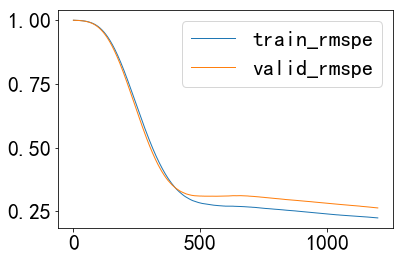

In [67]:
#查看loss 记录
train_log = evals_result['train']
valid_log = evals_result['valid']
show_num = 1200
if(show_num >0):
    log_index = np.arange(show_num)#len(train_log['rmspe_xgboost'])

    plt.plot(log_index,train_log['rmspe_xgboost'][0:show_num],linewidth = 1,label = 'train_rmspe')
    plt.legend()
    plt.plot(log_index,valid_log['rmspe_xgboost'][0:show_num],linewidth = 1,label = 'valid_rmspe')
    plt.legend()
else:
    log_index = np.arange(len(train_log['rmspe_xgboost']))
    plt.plot(log_index,train_log['rmspe_xgboost'],linewidth = 1,label = 'train_rmspe')
    plt.legend()
    plt.plot(log_index,valid_log['rmspe_xgboost'],linewidth = 1,label = 'valid_rmspe')
    plt.legend()
    
    

In [68]:
print("best best_ntree_limit",xgboost_model.best_ntree_limit)
print("best_score:",xgboost_model.best_score)
print("bst.best_iteration",xgboost_model.best_iteration)



best best_ntree_limit 8835
best_score: 0.18477
bst.best_iteration 8834


In [69]:
#lightgbm
'''
if 'Customers' in data_data.columns:
    data_data.drop(['Customers'],axis=1,inplace=True)
X_train = data_data[0:813766]
X_valid = data_data[813766::]

y_train = np.log1p(X_train.Sales)
y_valid = np.log1p(X_valid.Sales)

X_valid_sales =X_valid['Sales'] 
X_train.drop(['Sales'],axis=1,inplace=True)
X_valid.drop(['Sales'],axis=1,inplace=True)

lgb_train = lgb.Dataset(X_train,y_train)
lgb_eval = lgb.Dataset(X_valid,y_valid,reference=lgb_train)

num_boost_round = 100
params = {
    'task':'train',
    'boosting_type':'gbdt',
    'objective':'regression',
    'metric':{'l2','mae'},
    'num_leaves':31,
    'learning_rate':0.2,
    'feature_fraction':0.9,
    'bagging_fraction':0.8,
    'bagging_freq':5,
    'verbose':0,
    'max_depth':10
}

gbm = lgb.train(params,lgb_train,num_boost_round=num_boost_round,valid_sets=lgb_eval,early_stopping_rounds=5)
 
y_pre = gbm.predict(X_valid,num_iteration=gbm.best_iteration)
#print(mean_squared_error(y_valid,lgb_predit) ** 0.5)
print("............... valid ...................")
print(y_pre)
'''


'\nif \'Customers\' in data_data.columns:\n    data_data.drop([\'Customers\'],axis=1,inplace=True)\nX_train = data_data[0:813766]\nX_valid = data_data[813766::]\n\ny_train = np.log1p(X_train.Sales)\ny_valid = np.log1p(X_valid.Sales)\n\nX_valid_sales =X_valid[\'Sales\'] \nX_train.drop([\'Sales\'],axis=1,inplace=True)\nX_valid.drop([\'Sales\'],axis=1,inplace=True)\n\nlgb_train = lgb.Dataset(X_train,y_train)\nlgb_eval = lgb.Dataset(X_valid,y_valid,reference=lgb_train)\n\nnum_boost_round = 100\nparams = {\n    \'task\':\'train\',\n    \'boosting_type\':\'gbdt\',\n    \'objective\':\'regression\',\n    \'metric\':{\'l2\',\'mae\'},\n    \'num_leaves\':31,\n    \'learning_rate\':0.2,\n    \'feature_fraction\':0.9,\n    \'bagging_fraction\':0.8,\n    \'bagging_freq\':5,\n    \'verbose\':0,\n    \'max_depth\':10\n}\n\ngbm = lgb.train(params,lgb_train,num_boost_round=num_boost_round,valid_sets=lgb_eval,early_stopping_rounds=5)\n \ny_pre = gbm.predict(X_valid,num_iteration=gbm.best_iteration)\n#p

In [70]:
#预测数据
#model_name="model/num20000_weight3_maxdepth6_eta0.01.model"
print(model_name)
xgboost_model = xgb.Booster(model_file=model_name)
y_pre = xgboost_model.predict(dvalid)


print(y_pre)
print('y_pre',len(y_pre))
print(len(y_valid))
print('X_valid_sales',len(X_valid_sales))
print(type(y_valid))

#load_model = booster.load_model('model/num20_w3_eta001.model')
#error = rmspe(np.expm1(y_valid.values), np.expm1(y_pre))
error = rmspe(np.expm1(y_valid.values),np.expm1(y_pre))
#print(type(np.expm1(y_pre)))
#print(type(y_valid.values))
print("*********************")
print((y_pre))
#print("pre:",y_pre)
print("valid_value:",y_valid.values)
#print(error)
print('RMSPE: {:.6f}'.format(error))

model/num30000_weight6_maxdepth9_eta0.008.model
[9.155301 8.460234 8.644388 ... 8.811196 8.547773 8.955609]
y_pre 30572
30572
X_valid_sales 30572
<class 'pandas.core.series.Series'>
*********************
[9.155301 8.460234 8.644388 ... 8.811196 8.547773 8.955609]
valid_value: [9.20341646 8.46632086 9.46319805 ... 8.5243674  8.41005332 8.69316127]
RMSPE: 0.185194


In [71]:
''' 

#lightgbm 整合预测数据
print("********************* test ***************************")
y_test =  gbm.predict(data_test,num_iteration=gbm.best_iteration)
y_test = np.expm1(y_test)
print(y_test)
noOpen_nums = data_test_noPenIds.shape[0]
test_noOpen_data = np.zeros(noOpen_nums)

result_noOpen={'Id':data_test_noPenIds,'Sales':test_noOpen_data}
result_noOpen = pd.DataFrame(result_noOpen)
print(result_noOpen['Sales'])
print("&&&&&&&&&&&&&&&&&&&&&&&")
print(data_test_noPenIds.shape)
print(result_noOpen)

result={'Id':data_test_ids,'Sales':y_test}
print(type(result))
result = pd.DataFrame(result)
print(result)

#数据整合
result_total = result.append(result_noOpen)
print(result_total.shape)
print(result_total)
print("%%%%%%%%%%%%%%%%%%")
result_total.sort_values(by = 'Id',axis = 0,ascending = True,inplace=True)

result_total.to_csv ("data/result_light.csv" , encoding = "utf-8",index=False)
print(result_total.index)
'''

' \n\n#lightgbm 整合预测数据\nprint("********************* test ***************************")\ny_test =  gbm.predict(data_test,num_iteration=gbm.best_iteration)\ny_test = np.expm1(y_test)\nprint(y_test)\nnoOpen_nums = data_test_noPenIds.shape[0]\ntest_noOpen_data = np.zeros(noOpen_nums)\n\nresult_noOpen={\'Id\':data_test_noPenIds,\'Sales\':test_noOpen_data}\nresult_noOpen = pd.DataFrame(result_noOpen)\nprint(result_noOpen[\'Sales\'])\nprint("&&&&&&&&&&&&&&&&&&&&&&&")\nprint(data_test_noPenIds.shape)\nprint(result_noOpen)\n\nresult={\'Id\':data_test_ids,\'Sales\':y_test}\nprint(type(result))\nresult = pd.DataFrame(result)\nprint(result)\n\n#数据整合\nresult_total = result.append(result_noOpen)\nprint(result_total.shape)\nprint(result_total)\nprint("%%%%%%%%%%%%%%%%%%")\nresult_total.sort_values(by = \'Id\',axis = 0,ascending = True,inplace=True)\n\nresult_total.to_csv ("data/result_light.csv" , encoding = "utf-8",index=False)\nprint(result_total.index)\n'

In [72]:
'''
learn_model = xgb.cv(params, dtrain, 1500,feval=rmspe_xgboost,verbose_eval=10)
print("sss")
'''

'\nlearn_model = xgb.cv(params, dtrain, 1500,feval=rmspe_xgboost,verbose_eval=10)\nprint("sss")\n'

In [73]:
'''
#print(learn_model)
learn_model.loc[30:,["test-rmspe_xgboost-mean", "train-rmspe_xgboost-mean"]].plot()
print('y_pre',len(y_pre))
print(len(y_valid))
print('X_valid_sales',len(X_valid_sales))
'''

'\n#print(learn_model)\nlearn_model.loc[30:,["test-rmspe_xgboost-mean", "train-rmspe_xgboost-mean"]].plot()\nprint(\'y_pre\',len(y_pre))\nprint(len(y_valid))\nprint(\'X_valid_sales\',len(X_valid_sales))\n'

<Figure size 432x288 with 0 Axes>

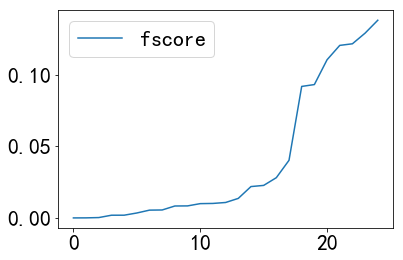

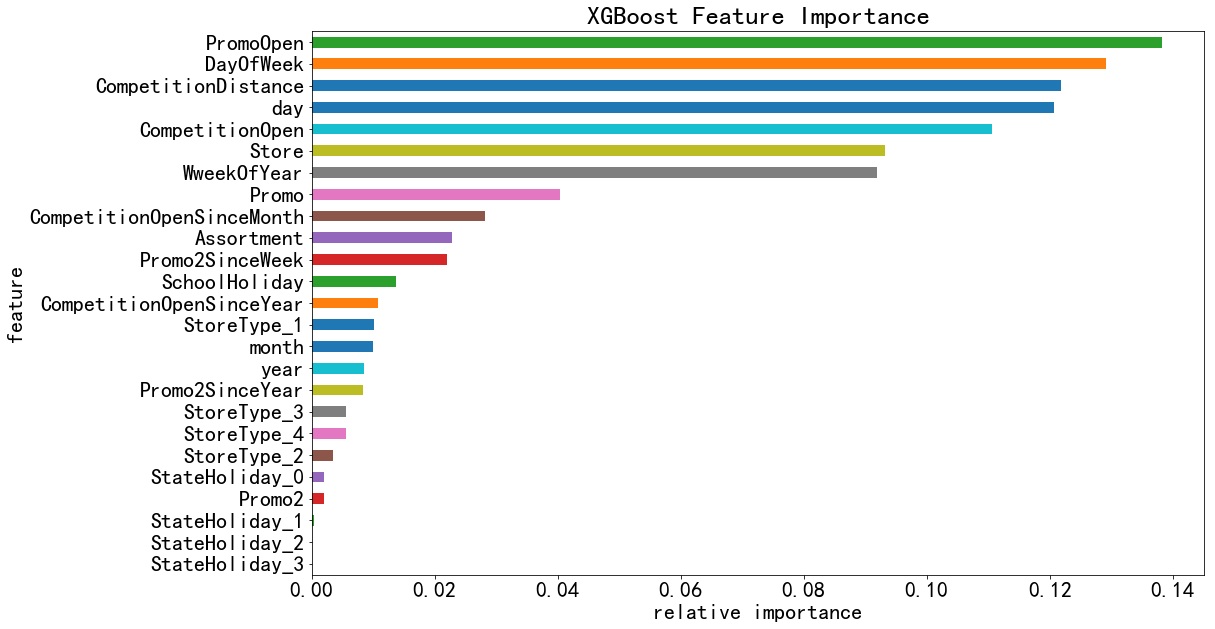

In [74]:
#特征重要性
import operator
importance = xgboost_model.get_fscore()
importance = sorted(importance.items(), key=operator.itemgetter(1))
df = pd.DataFrame(importance, columns=['feature', 'fscore'])
df['fscore'] = df['fscore'] / df['fscore'].sum()

plt.figure()
df.plot()
df.plot(kind='barh', x='feature', y='fscore', legend=False, figsize=(16, 10))
plt.title('XGBoost Feature Importance')
plt.xlabel('relative importance')

plt.show()



In [75]:
#测试数据集预测
#dtest_ids = data_test['Id']
#data_test.drop(['Id'],axis=1,inplace=True)
dtest = xgb.DMatrix(data_test)
print(data_test.shape)
#data_test_s0 = data_test['SchoolHoliday_0']
#data_test_s1 = data_test['SchoolHoliday_1']
#data_test.drop('SchoolHoliday_0',axis=1,inplace=True)
#data_test.drop('SchoolHoliday_1',axis=1,inplace=True)
#data_test.insert(18,'SchoolHoliday_0',data_test_s0)
#data_test.insert(19,'SchoolHoliday_1',data_test_s1)

print(data_test.columns.values)
print("%%%%%%%%%%%%%%%%%%%")
print(X_train.shape)
print(X_train.columns.values)
y_test = xgboost_model.predict(dtest)


y_test = np.expm1(y_test)
print(y_test)

print('y_pre',y_pre.shape)
print(len(y_valid))
print('X_valid_sales',X_valid_sales.shape)



(35104, 26)
['Assortment' 'CompetitionDistance' 'CompetitionOpen'
 'CompetitionOpenSinceMonth' 'CompetitionOpenSinceYear' 'DayOfWeek' 'Open'
 'Promo' 'Promo2' 'Promo2SinceWeek' 'Promo2SinceYear' 'PromoOpen'
 'SchoolHoliday' 'StateHoliday_0' 'StateHoliday_1' 'StateHoliday_2'
 'StateHoliday_3' 'Store' 'StoreType_1' 'StoreType_2' 'StoreType_3'
 'StoreType_4' 'WweekOfYear' 'day' 'month' 'year']
%%%%%%%%%%%%%%%%%%%
(813766, 26)
['Assortment' 'CompetitionDistance' 'CompetitionOpen'
 'CompetitionOpenSinceMonth' 'CompetitionOpenSinceYear' 'DayOfWeek' 'Open'
 'Promo' 'Promo2' 'Promo2SinceWeek' 'Promo2SinceYear' 'PromoOpen'
 'SchoolHoliday' 'StateHoliday_0' 'StateHoliday_1' 'StateHoliday_2'
 'StateHoliday_3' 'Store' 'StoreType_1' 'StoreType_2' 'StoreType_3'
 'StoreType_4' 'WweekOfYear' 'day' 'month' 'year']
[ 4250.7476  7384.5376  9063.522  ...  6197.002  22855.115   7510.6006]
y_pre (30572,)
30572
X_valid_sales (30572,)


In [76]:
print('y_pre',y_pre.shape)
print(len(y_valid))
print('X_valid_sales',X_valid_sales.shape)


y_pre (30572,)
30572
X_valid_sales (30572,)


In [77]:
result={'Id':data_test_ids,'Sales':y_test}
print(type(result))
result = pd.DataFrame(result)
print(result)


<class 'dict'>
          Id         Sales
0          1   4250.747559
1          2   7384.537598
2          3   9063.522461
3          4   7183.516602
4          5   7301.752441
5          6   5806.000977
6          7   7671.540527
7          8   7725.429199
8          9   5387.862793
9         10   5674.144531
10        11   6894.491211
11        12   8389.359375
12        13   7018.365723
13        14   8452.472656
14        15   5781.073242
15        16   4757.607910
16        17   5688.314941
17        18   9945.851562
18        19  10106.539062
19        20   9641.400391
20        21   7800.121582
21        22   4644.450195
22        23   5773.655762
23        24   4396.406250
24        25   8168.573730
25        26  10362.181641
26        27   9300.126953
27        28   5681.509766
28        29   5165.646973
29        30   4271.314453
...      ...           ...
41058  41059   3224.554932
41059  41060   6209.794434
41060  41061   7880.555176
41061  41062  11996.174805
41062  41063 

In [78]:
#处理open=0 的数据
print(result.loc[(result['Id']==544)])
print("******************************")
noOpen_nums = data_test_noPenIds.shape[0]
test_noOpen_data = np.zeros(noOpen_nums)

result_noOpen={'Id':data_test_noPenIds,'Sales':test_noOpen_data}
result_noOpen = pd.DataFrame(result_noOpen)
print(result_noOpen['Sales'])
print("&&&&&&&&&&&&&&&&&&&&&&&")
print(data_test_noPenIds.shape)
print(result_noOpen)


Empty DataFrame
Columns: [Id, Sales]
Index: []
******************************
543      0.0
676      0.0
840      0.0
1399     0.0
1532     0.0
1696     0.0
2255     0.0
2388     0.0
2552     0.0
3111     0.0
3244     0.0
3408     0.0
3424     0.0
3425     0.0
3426     0.0
3427     0.0
3428     0.0
3429     0.0
3430     0.0
3431     0.0
3432     0.0
3433     0.0
3434     0.0
3435     0.0
3436     0.0
3437     0.0
3438     0.0
3439     0.0
3440     0.0
3441     0.0
        ... 
40200    0.0
40201    0.0
40202    0.0
40203    0.0
40204    0.0
40205    0.0
40206    0.0
40207    0.0
40208    0.0
40209    0.0
40210    0.0
40211    0.0
40212    0.0
40213    0.0
40214    0.0
40215    0.0
40218    0.0
40219    0.0
40220    0.0
40221    0.0
40222    0.0
40223    0.0
40224    0.0
40225    0.0
40226    0.0
40227    0.0
40228    0.0
40229    0.0
40230    0.0
40231    0.0
Name: Sales, Length: 5984, dtype: float64
&&&&&&&&&&&&&&&&&&&&&&&
(5984,)
          Id  Sales
543      544    0.0
676      677   

In [79]:
result_total = result.append(result_noOpen)
print(result_total.shape)
print(result_total)
print("%%%%%%%%%%%%%%%%%%")
result_total.sort_values(by = 'Id',axis = 0,ascending = True,inplace=True)

result_total.to_csv ("data/result.csv" , encoding = "utf-8",index=False)
print(result_total.index)

(41088, 2)
          Id         Sales
0          1   4250.747559
1          2   7384.537598
2          3   9063.522461
3          4   7183.516602
4          5   7301.752441
5          6   5806.000977
6          7   7671.540527
7          8   7725.429199
8          9   5387.862793
9         10   5674.144531
10        11   6894.491211
11        12   8389.359375
12        13   7018.365723
13        14   8452.472656
14        15   5781.073242
15        16   4757.607910
16        17   5688.314941
17        18   9945.851562
18        19  10106.539062
19        20   9641.400391
20        21   7800.121582
21        22   4644.450195
22        23   5773.655762
23        24   4396.406250
24        25   8168.573730
25        26  10362.181641
26        27   9300.126953
27        28   5681.509766
28        29   5165.646973
29        30   4271.314453
...      ...           ...
40200  40201      0.000000
40201  40202      0.000000
40202  40203      0.000000
40203  40204      0.000000
40204  40205     

In [80]:
#print(result.loc[(result['Id']==41088)])

random_i 105
(30572,)
(30572,)
[ 9751.174  10953.233   5893.0396 10193.385   3816.5315  5940.4287
  6987.453   5256.407   7712.8984  5732.543   6615.8184  4924.744
  6057.37   12105.778   8126.796   5262.1514  5305.389   8813.162
 11750.123   8881.445   5766.5996  6659.192   6049.5005  6560.214
  6768.095   6669.28    4746.4575  7603.0674  8669.777   4242.3706
  5723.2935  5034.1255  6247.7524 10437.656   8019.8027  8569.177
 13660.422   7076.186  12562.511  12146.685   8045.0005  5914.0884
  3967.6091  7955.9653  6453.2515  6350.243   6916.946   7116.4927
 11525.155   5376.9478  4453.8755  8700.443   5168.8853  8385.24
  4899.1294  4262.714   7440.788   3965.3237  8198.492   8558.403
  6494.6606  7726.262   7943.1055  8392.385   6027.8774  8335.602
  9702.395   7129.7817  4344.6484  4826.308   5945.0938 11306.101
  7006.173   7119.928   4091.213   8093.4644  9443.67    6574.8594
  6980.5254  8577.092   5876.75   19718.537   6211.749   9481.648
  5836.635   6287.0815  4845.3955  3975.6

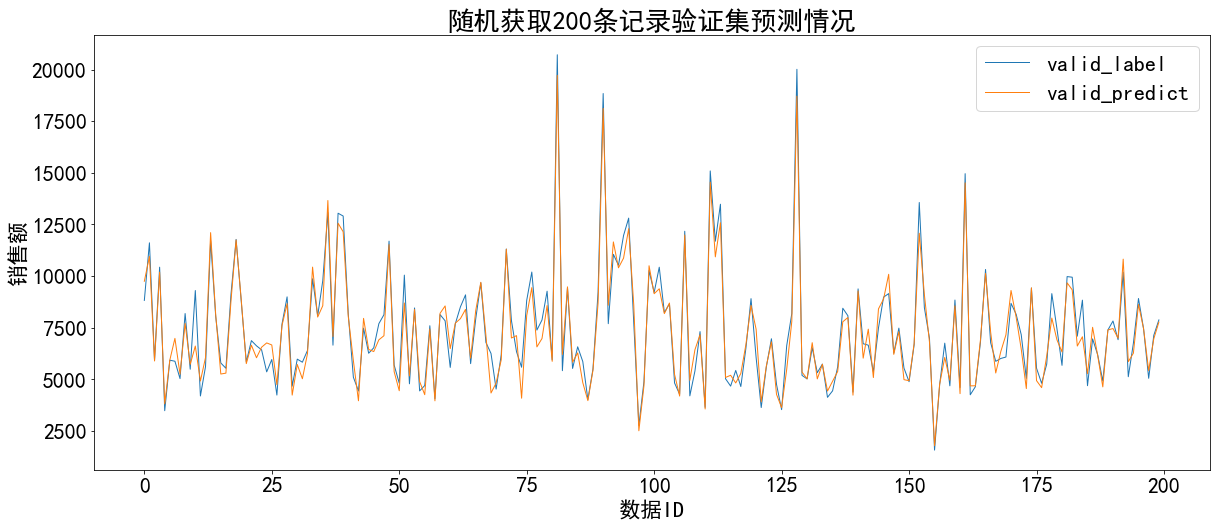

In [81]:
#从验证集合
import random
#print(type(X_valid_sales))
random_i = random.randint(0,150)
data_size = 200
print("random_i",random_i)
print(X_valid_sales.shape)
print(y_pre.shape)
print(np.expm1(y_pre[random_i*data_size:(random_i+1)*data_size]))
#print(y_valid[random_i*data_size:(random_i+1)*data_size])
fig = plt.figure(figsize=(20,8))
x_index = np.arange(200)
print(x_index)
plt.plot(x_index,X_valid_sales[random_i*data_size:(random_i+1)*data_size],linewidth = 1,label = 'valid_label')
plt.legend()
plt.plot(x_index,np.expm1(y_pre[random_i*data_size:(random_i+1)*data_size]),linewidth = 1,label = 'valid_predict')
plt.legend()
plt.title('随机获取200条记录验证集预测情况')
plt.xlabel('数据ID')
plt.ylabel('销售额')
plt.savefig('predict_1.jpg')

min: -17579
max: 10584


Text(0,0.5,'count')

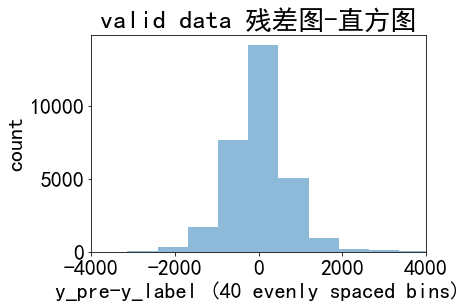

In [82]:
#残差图
valid_sub = np.expm1(y_pre) - X_valid_sales
#print(valid_sub)
print('min:',math.ceil(min(valid_sub)))
print('max:',math.floor(max(valid_sub)))
bins = np.linspace(math.ceil(min(valid_sub)),
                   math.floor(max(valid_sub)),40) # fixed number of bins
plt.xlim([-4000, 4000])
 
plt.hist(valid_sub, bins=bins, alpha=0.5)
plt.title('valid data 残差图-直方图')
plt.xlabel('y_pre-y_label (40 evenly spaced bins)')
plt.ylabel('count')

Int64Index([813766, 813767, 813768, 813769, 813770, 813771, 813772, 813773,
            813774, 813775,
            ...
            844328, 844329, 844330, 844331, 844332, 844333, 844334, 844335,
            844336, 844337],
           dtype='int64', length=30572)


Text(0.5,1,'检验集的残差散点图')

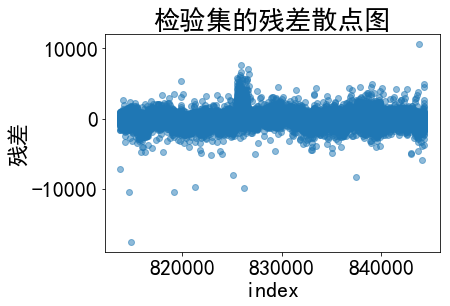

In [83]:
#散点图
print(X_valid_sales.index)
plt.scatter(X_valid_sales.index,valid_sub,alpha=0.5,label='检验集残差')
plt.xlabel("index")
plt.ylabel("残差")
plt.title("检验集的残差散点图")